# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
!pip install numpy==1.26.4 pandas==2.2.2 matplotlib==3.8.4 seaborn==0.13.2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 64.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 70.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [1]:
# Import the libraries you will be using for analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.8.4
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [5]:
# Try loading one file

# df = pd.read_parquet('2023-1.parquet')
# df.info()
df = pd.read_parquet('yellow_tripdata_2023-01.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [10]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Create an empty DataFrame to store sampled data
sampled_data = pd.DataFrame()

# Loop through each hour of the day and sample 5% data for each hour
for hour in range(24):
    hour_data = df[df['tpep_pickup_datetime'].dt.hour == hour]
    if not hour_data.empty:
        sample = hour_data.sample(frac=0.05, random_state=42)
        sampled_data = pd.concat([sampled_data, sample], ignore_index=True)

sampled_data.head(10)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-18 00:32:54   2023-01-18 00:45:04              1.0   
1         1  2023-01-15 00:17:26   2023-01-15 00:27:34              1.0   
2         1  2023-01-28 00:46:31   2023-01-28 00:53:58              1.0   
3         1  2023-01-28 00:57:26   2023-01-28 01:02:03              1.0   
4         2  2023-01-29 00:32:44   2023-01-29 00:42:06              2.0   
5         2  2023-01-18 00:03:58   2023-01-18 00:38:08              1.0   
6         2  2023-01-28 00:37:40   2023-01-28 00:52:28              1.0   
7         2  2023-01-04 00:32:35   2023-01-04 00:54:30              1.0   
8         2  2023-01-31 00:57:01   2023-01-31 01:01:58              1.0   
9         2  2023-01-12 00:52:41   2023-01-12 00:55:46              2.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.21         1.0                  N           158           161   
1           1.50         1.0                  N           144           107   
2           1.30         1.0                  N           249            90   
3           1.10         1.0                  N           237            48   
4           0.99         1.0                  N           148           113   
5          17.31         2.0                  N           132           230   
6           3.37         1.0                  N           234           236   
7           9.36         1.0                  N            88           179   
8           1.58         1.0                  N           137            79   
9           0.91         1.0                  N            68           246   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1         15.6    1.0      0.5        4.12          0.00   
1             1         10.7    3.5      0.5        3.95          0.00   
2             1          9.3    3.5      0.5        1.00          0.00   
3             1          7.2    3.5      0.5        3.65          0.00   
4             2         10.0    1.0      0.5        0.00          0.00   
5             1         70.0    0.0      0.5        0.01          6.55   
6             2         18.4    1.0      0.5        0.00          0.00   
7             1         38.7    1.0      0.5        8.74          0.00   
8             1          8.6    1.0      0.5        4.00          0.00   
9             1          6.5    1.0      0.5        3.00          0.00   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
0                    1.0         24.72                   2.5         0.00  
1                    1.0         19.65                   2.5         0.00  
2                    1.0         15.30                   2.5         0.00  
3                    1.0         15.85                   2.5         0.00  
4                    1.0         15.00                   2.5         0.00  
5                    1.0         81.81                   2.5         1.25  
6                    1.0         23.40                   2.5         0.00  
7                    1.0         52.44                   2.5         0.00  
8                    1.0         17.60                   2.5         0.00  
9                    1.0         14.50                   2.5         0.00

In [12]:
 from google.colab import drive
 drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/content/drive/MyDrive/Assignment_YellowTaxiDataSet/')

# Create a list of all the twelve files to read
file_list = [f for f in os.listdir() if f.endswith('.parquet')]

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        monthly_data = pd.read_parquet(file_path)

        # Ensure that the 'tpep_pickup_datetime' is in datetime format
        monthly_data['tpep_pickup_datetime'] = pd.to_datetime(monthly_data['tpep_pickup_datetime'])

        # Extract date and hour
        monthly_data['pickup_date'] = monthly_data['tpep_pickup_datetime'].dt.date
        monthly_data['pickup_hour'] = monthly_data['tpep_pickup_datetime'].dt.hour


        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in monthly_data['pickup_date'].unique():
        # Iterate through each hour of the selected date
            for hour in range(24):
                hour_data = monthly_data[(monthly_data['pickup_date'] == date) & (monthly_data['pickup_hour'] == hour)]
                # Sample 5% of the hourly data randomly
                sample = hour_data.sample(frac=0.05, random_state=42)
                # add data of this hour to the dataframe
                sampled_data = pd.concat([sampled_data, sample])


        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data]) # we initialised this empty DF earlier

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [14]:
# Store the df in csv/parquet
df.to_parquet('sampled_nyc_taxi_2023.parquet')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [24]:
# Load the new data file
df = pd.read_parquet('sampled_nyc_taxi_2023.parquet')


In [25]:
 df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
3468         1  2023-07-01 00:36:53   2023-07-01 00:44:52              3.0   
1029         1  2023-07-01 00:41:47   2023-07-01 00:44:30              2.0   
1964         2  2023-07-01 00:20:02   2023-07-01 00:46:03              2.0   
3651         2  2023-07-01 00:50:54   2023-07-01 00:57:54              1.0   
1211         2  2023-07-01 00:13:32   2023-07-01 00:52:21              1.0   

      trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
3468           1.20         1.0                  N           230   
1029           0.40         1.0                  N           107   
1964          10.42         1.0                  N           132   
3651           1.79         1.0                  N           263   
1211           9.43         1.0                  N           132   

      DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
3468           246             1          8.6    3.5      0.5         2.7   
1029           234             3          4.4    3.5      0.5         0.0   
1964            72             2         42.2    1.0      0.5         0.0   
3651           229             1         10.0    1.0      0.5         3.0   
1211           198             2         48.5    1.0      0.5         0.0   

      tolls_amount  improvement_surcharge  total_amount  congestion_surcharge  \
3468           0.0                    1.0         16.30                   2.5   
1029           0.0                    1.0          9.40                   2.5   
1964           0.0                    1.0         44.70                   0.0   
3651           0.0                    1.0         18.00                   2.5   
1211           0.0                    1.0         52.75                   0.0   

      Airport_fee pickup_date  pickup_hour  airport_fee  
3468         0.00  2023-07-01            0          NaN  
1029         0.00  2023-07-01            0          NaN  
1964         0.00  2023-07-01            0          NaN  
3651         0.00  2023-07-01            0          NaN  
1211         1.75  2023-07-01            0          NaN

In [26]:
pd.set_option("display.max_columns",None)

In [27]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1915511 entries, 3468 to 3194864
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee            f

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [28]:
# Fix the index and drop any columns that are not needed

df.reset_index(drop=True, inplace=True)
df = df.drop(['pickup_date', 'pickup_hour'], axis=1)

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [29]:
# Combine the two airport fee columns
df['airport_fee_combined'] = df[['airport_fee', 'Airport_fee']].max(axis=1)
df = df.drop(['airport_fee', 'Airport_fee'], axis=1)


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [34]:
# check where values of fare amount are negative
df[df['fare_amount'] < 0]
df = df[df['fare_amount'] >= 0]
df[df['fare_amount'] < 0]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee_combined]
Index: []

Did you notice something different in the `RatecodeID` column for above records?

In [37]:
# Analyse RatecodeID for the negative fare amounts

df[df['fare_amount'] < 0]['RatecodeID'].value_counts().sort_index()



Series([], Name: count, dtype: int64)

In [39]:
# Find which columns have negative values

numeric_cols = df.select_dtypes(include='number').columns

negative_columns = {}

for col in numeric_cols:
    negative_count = (df[col] < 0).sum()
    if negative_count > 0:
        negative_columns[col] = negative_count

print("Columns with negative values:")
for col, count in negative_columns.items():
    print(f"{col}: {count}")

Columns with negative values:
extra: 2
mta_tax: 97
improvement_surcharge: 105
total_amount: 105
congestion_surcharge: 74
airport_fee_combined: 26


In [43]:
# fix these negative values

# These columns have negative values
columns_with_negatives = ['extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee_combined']

for col in columns_with_negatives:
    print(f"\nNegative values in '{col}':")
    print(df[df[col] < 0][['fare_amount', col, 'RatecodeID']].head())

df = df[(df[columns_with_negatives] >= 0).all(axis=1)]



Negative values in 'extra':
         fare_amount  extra  RatecodeID
1082761          0.0   -1.0         1.0
1407090          0.0   -5.0         2.0

Negative values in 'mta_tax':
       fare_amount  mta_tax  RatecodeID
4651           0.0     -0.5         2.0
9627           0.0     -0.5         1.0
40332          0.0     -0.5         1.0
47825          0.0     -0.5         1.0
54085          0.0     -0.5         1.0

Negative values in 'improvement_surcharge':
       fare_amount  improvement_surcharge  RatecodeID
4651           0.0                   -1.0         2.0
9627           0.0                   -1.0         1.0
40332          0.0                   -1.0         1.0
47825          0.0                   -1.0         1.0
54085          0.0                   -1.0         1.0

Negative values in 'total_amount':
       fare_amount  total_amount  RatecodeID
4651           0.0         -4.00         2.0
9627           0.0         -3.25         1.0
40332          0.0         -4.00        

In [44]:
(df[columns_with_negatives] < 0).sum()

extra                    0
mta_tax                  0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee_combined     0
dtype: int64

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [45]:
# Find the proportion of missing values in each column

df.isnull().mean() * 100

VendorID                 0.0
tpep_pickup_datetime     0.0
tpep_dropoff_datetime    0.0
passenger_count          0.0
trip_distance            0.0
RatecodeID               0.0
store_and_fwd_flag       0.0
PULocationID             0.0
DOLocationID             0.0
payment_type             0.0
fare_amount              0.0
extra                    0.0
mta_tax                  0.0
tip_amount               0.0
tolls_amount             0.0
improvement_surcharge    0.0
total_amount             0.0
congestion_surcharge     0.0
airport_fee_combined     0.0
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [48]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
df[df.isnull().any(axis=1)]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee_combined]
Index: []

In [49]:
df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee_combined     0
dtype: int64

In [52]:
df['passenger_count'] = df['passenger_count'].fillna(df['passenger_count'].mode()[0])


In [53]:
df['passenger_count'].isnull().sum()


0

Did you find zeroes in passenger_count? Handle these.

In [59]:
mode_passenger_count = df['passenger_count'].mode()[0]
df['passenger_count'] = df['passenger_count'].astype('float').fillna(mode_passenger_count)



In [60]:
print(df['passenger_count'].dtype)  # float64

print(df['passenger_count'].isnull().sum())  # 0 (meaning no missing values)


float64
0


**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [62]:
# Fix missing values in 'RatecodeID'
mode_ratecodeid = df['RatecodeID'].mode()[0]
df['RatecodeID'] = df['RatecodeID'].fillna(mode_ratecodeid)


In [63]:
print(df['RatecodeID'].isnull().sum())  # 0 if no missing values


0


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [66]:
# handle null values in congestion_surcharge


df['congestion_surcharge'] = df['congestion_surcharge'].fillna(0)
print(df['congestion_surcharge'].isnull().sum())  # Should print 0

0


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [68]:
# Handle any remaining missing values

print(df.isnull().sum())


VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee_combined     0
dtype: int64


In [69]:
df.isnull().mean() * 100

VendorID                 0.0
tpep_pickup_datetime     0.0
tpep_dropoff_datetime    0.0
passenger_count          0.0
trip_distance            0.0
RatecodeID               0.0
store_and_fwd_flag       0.0
PULocationID             0.0
DOLocationID             0.0
payment_type             0.0
fare_amount              0.0
extra                    0.0
mta_tax                  0.0
tip_amount               0.0
tolls_amount             0.0
improvement_surcharge    0.0
total_amount             0.0
congestion_surcharge     0.0
airport_fee_combined     0.0
dtype: float64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [75]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

df.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  1.831541e+06                     1831541                     1831541   
mean   1.736351e+00  2023-07-01 21:43:52.386262  2023-07-01 22:01:13.543382   
min    1.000000e+00         2022-12-31 23:51:30         2022-12-31 23:56:06   
25%    1.000000e+00         2023-04-01 20:20:44         2023-04-01 20:36:04   
50%    2.000000e+00         2023-06-26 09:16:48         2023-06-26 09:34:16   
75%    2.000000e+00         2023-10-05 19:37:21         2023-10-05 19:52:58   
max    2.000000e+00         2023-12-31 23:58:50         2024-01-01 00:29:11   
std    4.406113e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     1.831541e+06   1.831541e+06  1.831541e+06  1.831541e+06   
mean      1.385080e+00   3.539963e+00  1.630624e+00  1.654502e+02   
min       1.000000e+00   0.000000e+00  1.000000e+00  1.000000e+00   
25%       1.000000e+00   1.050000e+00  1.000000e+00  1.320000e+02   
50%       1.000000e+00   1.780000e+00  1.000000e+00  1.620000e+02   
75%       1.000000e+00   3.370000e+00  1.000000e+00  2.340000e+02   
max       9.000000e+00   6.235952e+04  9.900000e+01  2.650000e+02   
std       8.758438e-01   5.308277e+01  7.362790e+00  6.368502e+01   

       DOLocationID  payment_type   fare_amount         extra       mta_tax  \
count  1.831541e+06  1.831541e+06  1.831541e+06  1.831541e+06  1.831541e+06   
mean   1.642496e+02  1.205342e+00  1.975635e+01  1.637619e+00  4.952562e-01   
min    1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.140000e+02  1.000000e+00  9.300000e+00  0.000000e+00  5.000000e-01   
50%    1.620000e+02  1.000000e+00  1.350000e+01  1.000000e+00  5.000000e-01   
75%    2.340000e+02  1.000000e+00  2.190000e+01  2.500000e+00  5.000000e-01   
max    2.650000e+02  4.000000e+00  9.046000e+02  1.425000e+01  5.750000e+00   
std    6.979836e+01  4.676168e-01  1.844153e+01  1.835048e+00  4.903263e-02   

         tip_amount  tolls_amount  improvement_surcharge  total_amount  \
count  1.831541e+06  1.831541e+06           1.831541e+06  1.831541e+06   
mean   3.574521e+00  5.950253e-01           9.993029e-01  2.887857e+01   
min    0.000000e+00  0.000000e+00           0.000000e+00  0.000000e+00   
25%    1.000000e+00  0.000000e+00           1.000000e+00  1.596000e+01   
50%    2.860000e+00  0.000000e+00           1.000000e+00  2.100000e+01   
75%    4.450000e+00  0.000000e+00           1.000000e+00  3.070000e+01   
max    4.111000e+02  1.047500e+02           1.000000e+00  9.061000e+02   
std    4.067748e+00  2.181868e+00           2.458552e-02  2.303267e+01   

       congestion_surcharge  airport_fee_combined  
count          1.831541e+06          1.831541e+06  
mean           2.306567e+00          1.429407e-01  
min            0.000000e+00          0.000000e+00  
25%            2.500000e+00          0.000000e+00  
50%            2.500000e+00          0.000000e+00  
75%            2.500000e+00          0.000000e+00  
max            2.500000e+00          1.750000e+00  
std            6.679557e-01          4.648282e-01

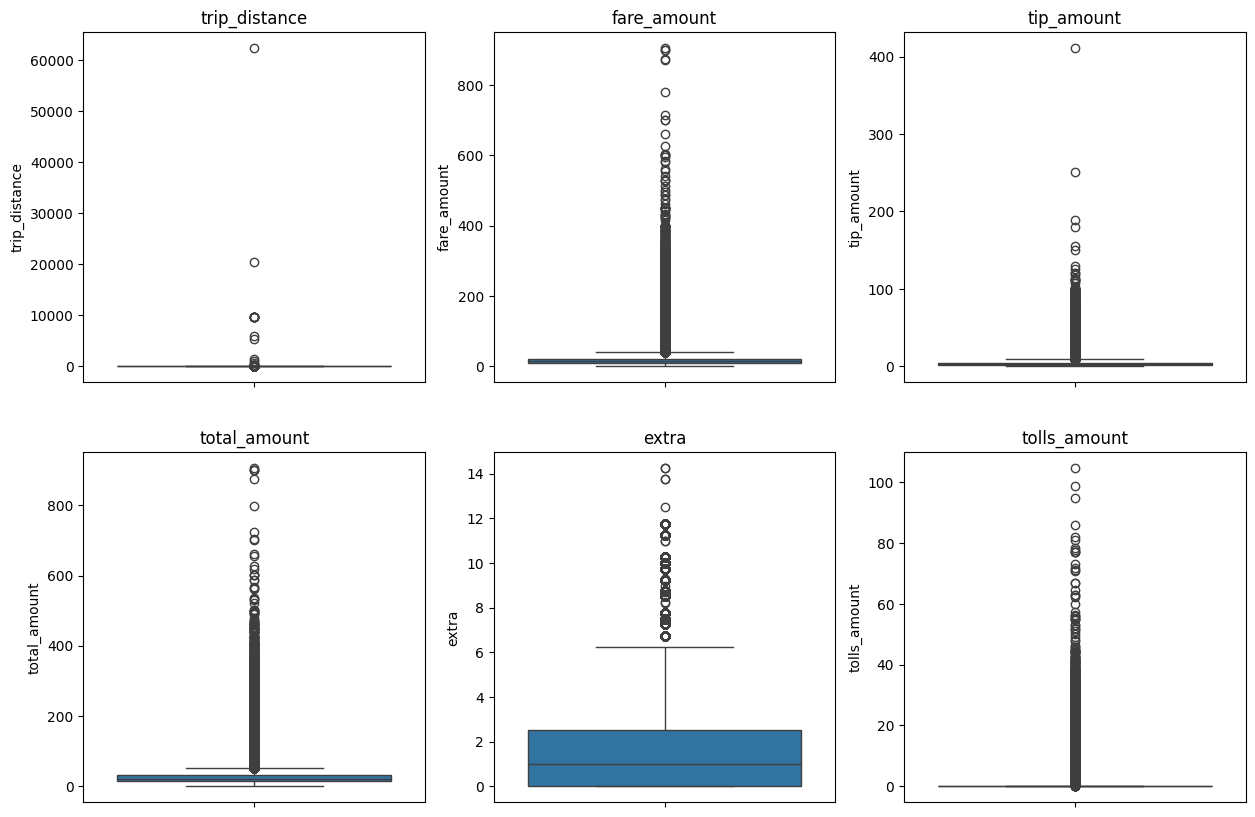

In [73]:
cols_to_check = ['trip_distance', 'fare_amount', 'tip_amount', 'total_amount', 'extra', 'tolls_amount']

plt.figure(figsize=(15, 10))
for i, col in enumerate(cols_to_check, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.show()

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [77]:
# remove passenger_count > 6
df = df[(df['passenger_count'] > 0) & (df['passenger_count'] <= 6)]


In [81]:
# Continue with outlier handling

df = df[~((df['trip_distance'] < 0.1) & (df['fare_amount'] > 300))]

df = df[~((df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID']))]

df = df[df['trip_distance'] <= 250]

df = df[df['payment_type'] != 0]

df = df[df['tip_amount'] <= df['fare_amount']]

In [79]:
# Do any columns need standardising?
cols_to_scale = ['trip_distance', 'fare_amount', 'total_amount', 'tip_amount', 'tolls_amount']
for col in cols_to_scale:
    df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [82]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee_combined']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

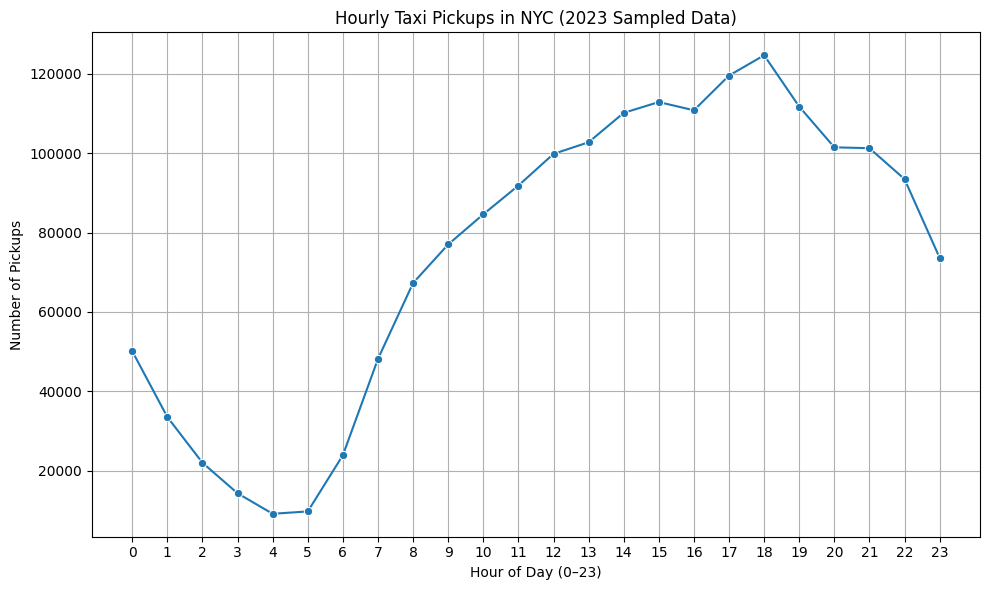

In [85]:
# Find and show the hourly trends in taxi pickups
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
hourly_trend = df.groupby('pickup_hour').size().reset_index(name='pickup_count')

plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_trend, x='pickup_hour', y='pickup_count', marker='o')
plt.title('Hourly Taxi Pickups in NYC (2023 Sampled Data)')
plt.xlabel('Hour of Day (0–23)')
plt.ylabel('Number of Pickups')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-88-ee10d7bc3722>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=daily_trend, x='pickup_day', y='pickup_count', palette='viridis')


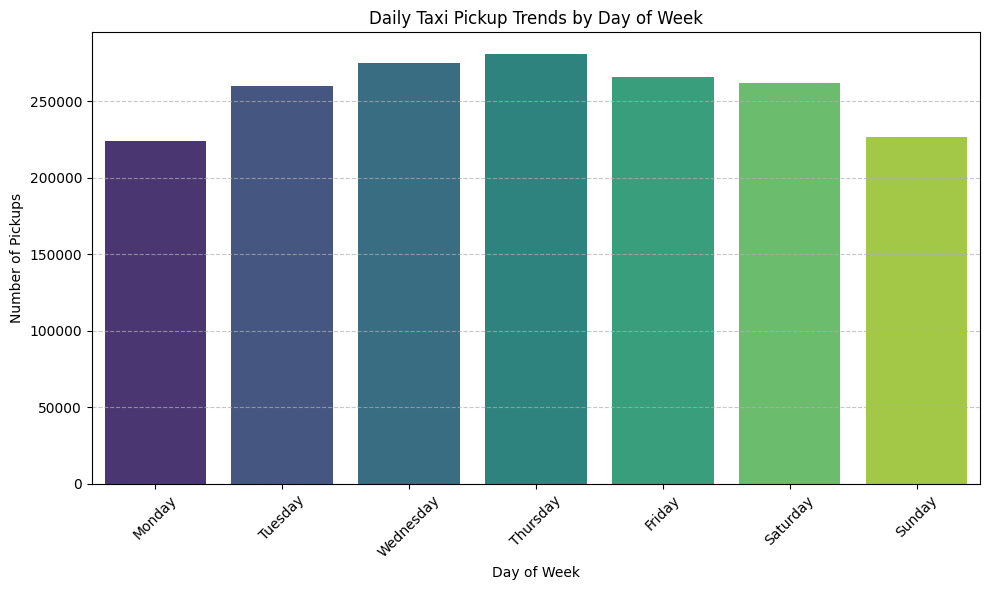

In [88]:
# Find and show the daily trends in taxi pickups (days of the week)

df['pickup_day'] = df['tpep_pickup_datetime'].dt.day_name()

daily_trend = df.groupby('pickup_day').size().reset_index(name='pickup_count')

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_trend['pickup_day'] = pd.Categorical(daily_trend['pickup_day'], categories=weekday_order, ordered=True)
daily_trend = daily_trend.sort_values('pickup_day')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=daily_trend, x='pickup_day', y='pickup_count', palette='viridis')
plt.title('Daily Taxi Pickup Trends by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

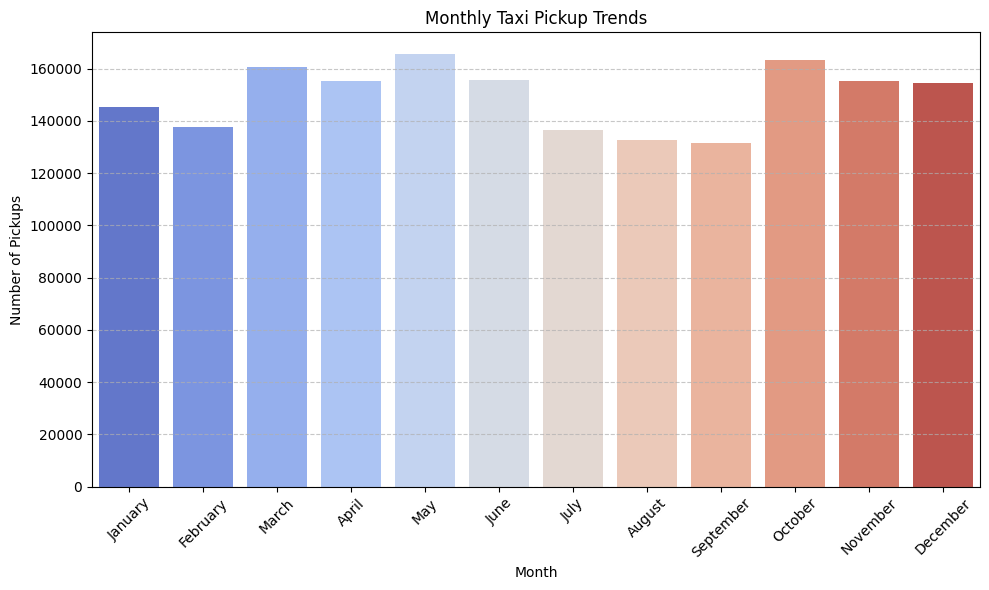

In [91]:
# Show the monthly trends in pickups

df['pickup_month'] = df['tpep_pickup_datetime'].dt.month_name()


month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
df['pickup_month'] = pd.Categorical(df['pickup_month'], categories=month_order, ordered=True)


monthly_trend = df.groupby('pickup_month', observed=False).size().reset_index(name='pickup_count')
monthly_trend = monthly_trend.sort_values('pickup_month')


plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_trend, x='pickup_month', y='pickup_count',
            hue='pickup_month', palette='coolwarm', legend=False)
plt.title('Monthly Taxi Pickup Trends')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [99]:
# Analyse the above parameters
cols = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

for col in cols:
    zero_count = (df[col] == 0).sum()
    negative_count = (df[col] < 0).sum()
    print(f"{col} — Zeros: {zero_count:,}, Negatives: {negative_count:,}")


fare_amount — Zeros: 0, Negatives: 0
tip_amount — Zeros: 0, Negatives: 0
total_amount — Zeros: 0, Negatives: 0
trip_distance — Zeros: 0, Negatives: 0


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [98]:
# Create a df with non zero entries for the selected parameters.

df_copy = df.copy()

df = df[
    (df['fare_amount'] > 0) &
    (df['total_amount'] > 0) &
    (df['trip_distance'] > 0) &
    (df['tip_amount'] > 0)
].copy()


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

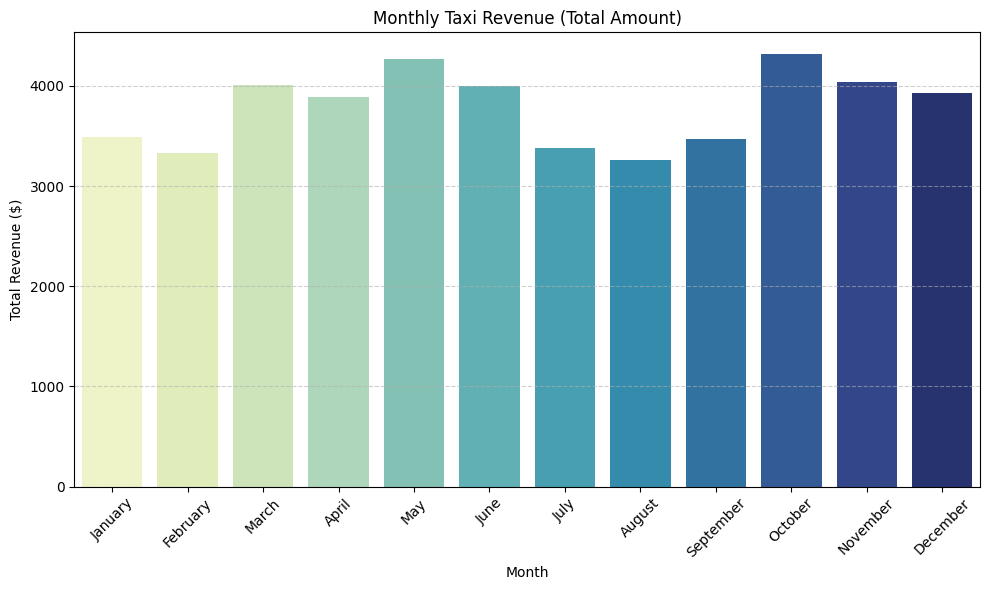

In [103]:
# Group data by month and analyse monthly revenue

df['pickup_month'] = df['tpep_pickup_datetime'].dt.month_name()
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
df['pickup_month'] = pd.Categorical(df['pickup_month'], categories=month_order, ordered=True)

monthly_revenue = df.groupby('pickup_month', observed=False)['total_amount'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(
    data=monthly_revenue,
    x='pickup_month',
    y='total_amount',
    hue='pickup_month',
    palette='YlGnBu',
    legend=False
)
plt.title('Monthly Taxi Revenue (Total Amount)')
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [112]:
# Calculate proportion of each quarter

df['pickup_quarter'] = df['tpep_pickup_datetime'].dt.to_period('Q')
quarterly_revenue = df.groupby('pickup_quarter')['total_amount'].sum()
quarterly_proportion = (quarterly_revenue / quarterly_revenue.sum()) * 100
quarterly_proportion.round(2)

pickup_quarter
2022Q4     0.00
2023Q1    23.87
2023Q2    26.77
2023Q3    22.26
2023Q4    27.09
Freq: Q-DEC, Name: total_amount, dtype: float64

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

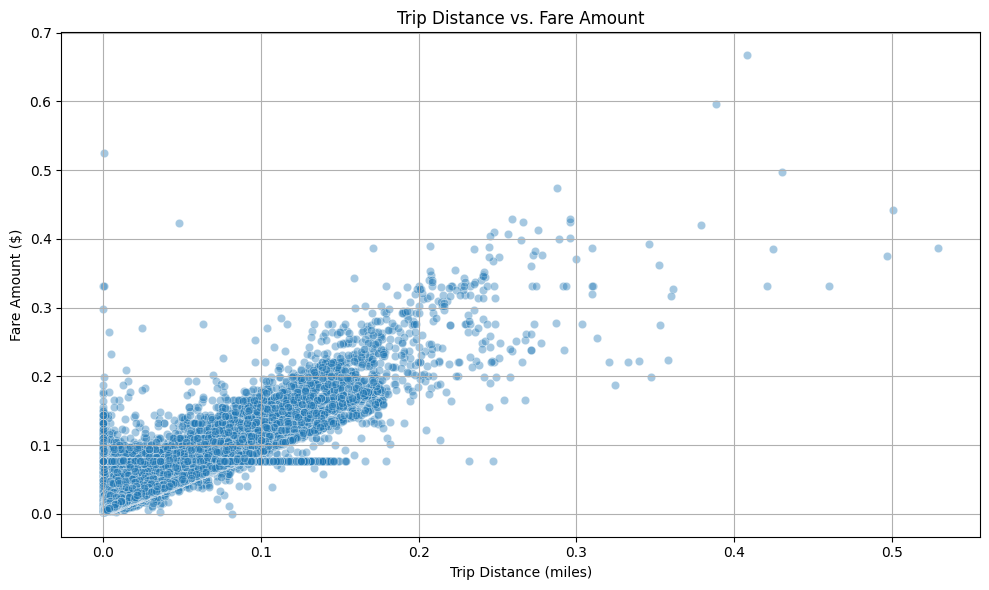

Correlation between trip distance and fare amount: 0.95


In [117]:
# Show how trip fare is affected by distance

filtered_df = df[df['trip_distance'] > 0]

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='trip_distance', y='fare_amount', alpha=0.4)
plt.title('Trip Distance vs. Fare Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Correlation
correlation = filtered_df['trip_distance'].corr(filtered_df['fare_amount'])
print(f"Correlation between trip distance and fare amount: {correlation:.2f}")

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

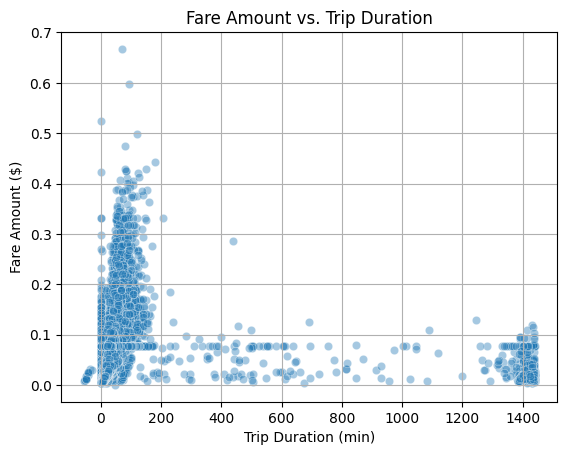

Correlation between trip duration and fare amount: 0.32


In [122]:
# Show relationship between fare and trip duration

df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60


sns.scatterplot(data=df, x='trip_duration', y='fare_amount', alpha=0.4)
plt.title('Fare Amount vs. Trip Duration')
plt.xlabel('Trip Duration (min)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.show()

correlation = df['trip_duration'].corr(df['fare_amount'])
print(f"Correlation between trip duration and fare amount: {correlation:.2f}")

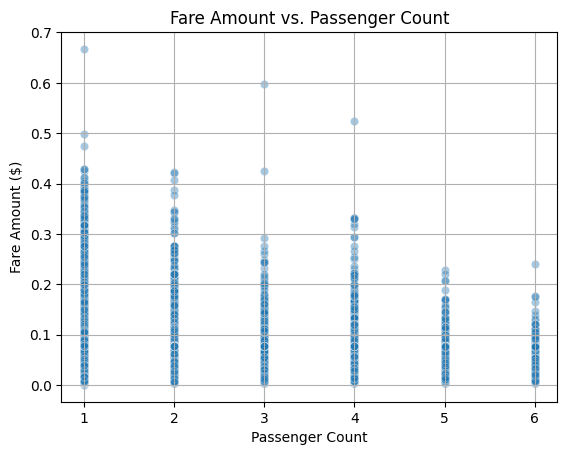

Correlation between passenger count and fare amount: 0.04


In [123]:
# Show relationship between fare and number of passengers

df_filtered = df[(df['trip_duration'] > 0) & (df['trip_duration'] <= 180)]

sns.scatterplot(data=df_filtered, x='passenger_count', y='fare_amount', alpha=0.4)
plt.title('Fare Amount vs. Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.show()

correlation = df['passenger_count'].corr(df['fare_amount'])
print(f"Correlation between passenger count and fare amount: {correlation:.2f}")

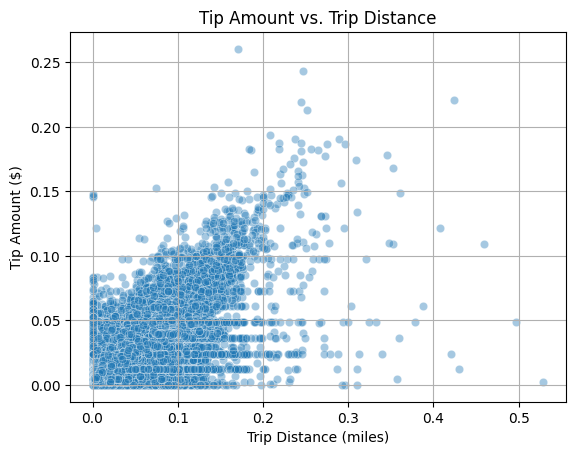

Correlation between trip distance and tip amount: 0.84


In [126]:
# Show relationship between tip and trip distance

sns.scatterplot(data=df_filtered, x='trip_distance', y='tip_amount', alpha=0.4)
plt.title('Tip Amount vs. Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.grid(True)
plt.show()

correlation = df['trip_distance'].corr(df['tip_amount'])
print(f"Correlation between trip distance and tip amount: {correlation:.2f}")

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

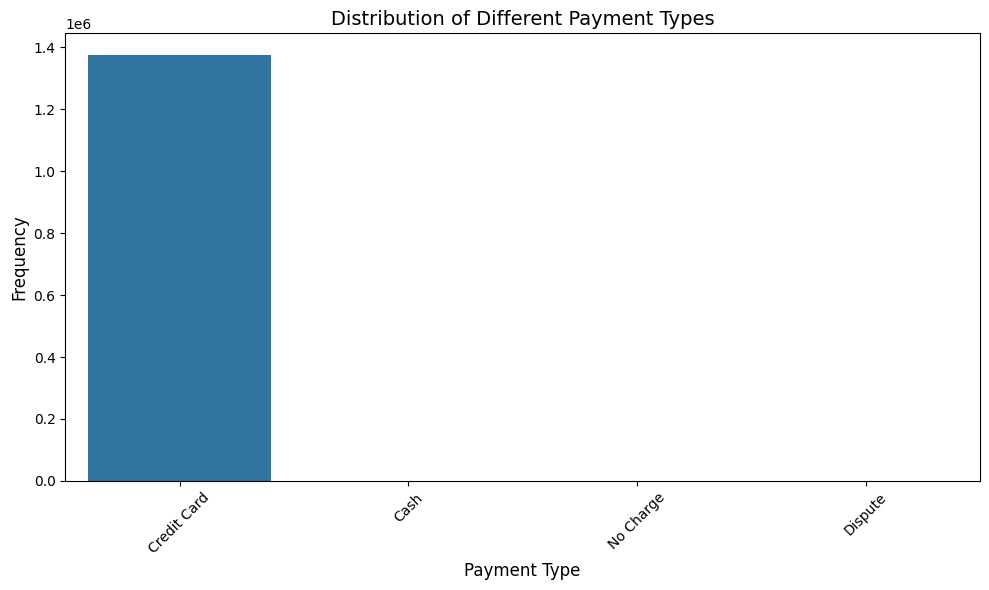

payment_type
1    100.0
2      0.0
3      0.0
4      0.0
Name: count, dtype: float64


In [128]:
# Analyse the distribution of different payment types (payment_type).
# Map numeric codes to labels
all_payment_types = [1, 2, 3, 4, 5, 6]
payment_type_labels = ['Credit Card', 'Cash', 'No Charge', 'Dispute', 'Unknown', 'Voided Trip']
payment_type_counts = df['payment_type'].value_counts().reindex(all_payment_types, fill_value=0)
payment_df = pd.DataFrame({
    'Type': payment_type_labels,
    'Count': payment_type_counts.values
})
payment_df = payment_df[payment_df['Count'] > 0]
plt.figure(figsize=(10, 6))
sns.barplot(data=payment_df, x='Type', y='Count')
plt.title('Distribution of Different Payment Types', fontsize=14)
plt.xlabel('Payment Type', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

payment_type_percentage = (payment_type_counts / payment_type_counts.sum()) * 100
non_zero_percentages = payment_type_percentage[payment_type_percentage > 0]
print(non_zero_percentages.round(2))



- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [129]:
 !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [134]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file('/content/taxi_zones.shp')
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

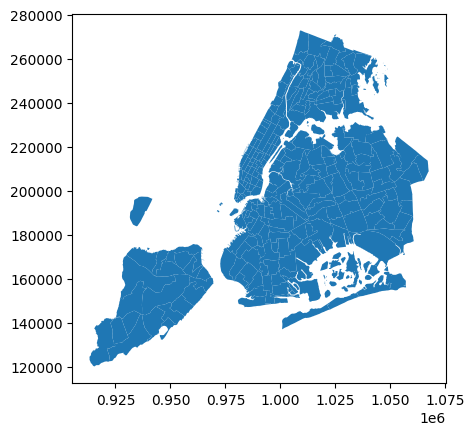

In [135]:
 print(zones.info())
 zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [136]:
# Merge zones and trip records using locationID and PULocationID

merged_df = pd.merge(df, zones, left_on='PULocationID', right_on='LocationID', how='left')

merged_df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2023-07-01 00:36:53   2023-07-01 00:44:52              3.0   
1         2  2023-07-01 00:50:54   2023-07-01 00:57:54              1.0   
2         2  2023-07-01 00:45:37   2023-07-01 00:58:18              1.0   
3         2  2023-07-01 00:15:21   2023-07-01 00:23:30              1.0   
4         2  2023-07-01 00:55:04   2023-07-01 01:07:50              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0       0.005362         1.0                  N           230           246   
1       0.007998         1.0                  N           263           229   
2       0.012913         1.0                  N           231           231   
3       0.008713         1.0                  N           230           249   
4       0.016532         1.0                  N            79           255   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1     0.009507    3.5      0.5    0.006568           0.0   
1             1     0.011055    1.0      0.5    0.007297           0.0   
2             1     0.018019    1.0      0.5    0.010362           0.0   
3             1     0.011828    1.0      0.5    0.007638           0.0   
4             1     0.021114    1.0      0.5    0.011725           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  \
0                    1.0      0.017989                   2.5   
1                    1.0      0.019865                   2.5   
2                    1.0      0.028209                   2.5   
3                    1.0      0.020792                   2.5   
4                    1.0      0.031917                   2.5   

   airport_fee_combined  pickup_hour pickup_day pickup_month pickup_quarter  \
0                   0.0            0   Saturday         July         2023Q3   
1                   0.0            0   Saturday         July         2023Q3   
2                   0.0            0   Saturday         July         2023Q3   
3                   0.0            0   Saturday         July         2023Q3   
4                   0.0            0   Saturday         July         2023Q3   

   trip_duration payment_type_label  OBJECTID  Shape_Leng  Shape_Area  \
0       7.983333        Credit Card     230.0    0.031028    0.000056   
1       7.000000        Credit Card     263.0    0.037017    0.000066   
2      12.683333        Credit Card     231.0    0.063420    0.000167   
3       8.150000        Credit Card     230.0    0.031028    0.000056   
4      12.766667        Credit Card      79.0    0.042625    0.000108   

                        zone  LocationID    borough  \
0  Times Sq/Theatre District       230.0  Manhattan   
1             Yorkville West       263.0  Manhattan   
2       TriBeCa/Civic Center       231.0  Manhattan   
3  Times Sq/Theatre District       230.0  Manhattan   
4               East Village        79.0  Manhattan   

                                            geometry  
0  POLYGON ((988786.877 214532.094, 988650.277 21...  
1  POLYGON ((997493.323 220912.386, 997355.264 22...  
2  POLYGON ((981667.364 203305, 981854.109 203130...  
3  POLYGON ((988786.877 214532.094, 988650.277 21...  
4  POLYGON ((988746.067 202151.955, 988733.885 20...

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [137]:
# Group data by location and calculate the number of trips

trip_counts = df.groupby('PULocationID').size().reset_index(name='num_trips')

trip_counts.head()

PULocationID  num_trips
0             1         36
1             3          1
2             4       1370
3             6          2
4             7        265

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [138]:
# Merge trip counts back to the zones GeoDataFrame

zones_with_trips = pd.merge(zones, trip_counts, left_on='LocationID', right_on='PULocationID', how='left')

zones_with_trips.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   PULocationID  num_trips  
0           1.0       36.0  
1           NaN        NaN  
2           3.0        1.0  
3           4.0     1370.0  
4           NaN        NaN

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

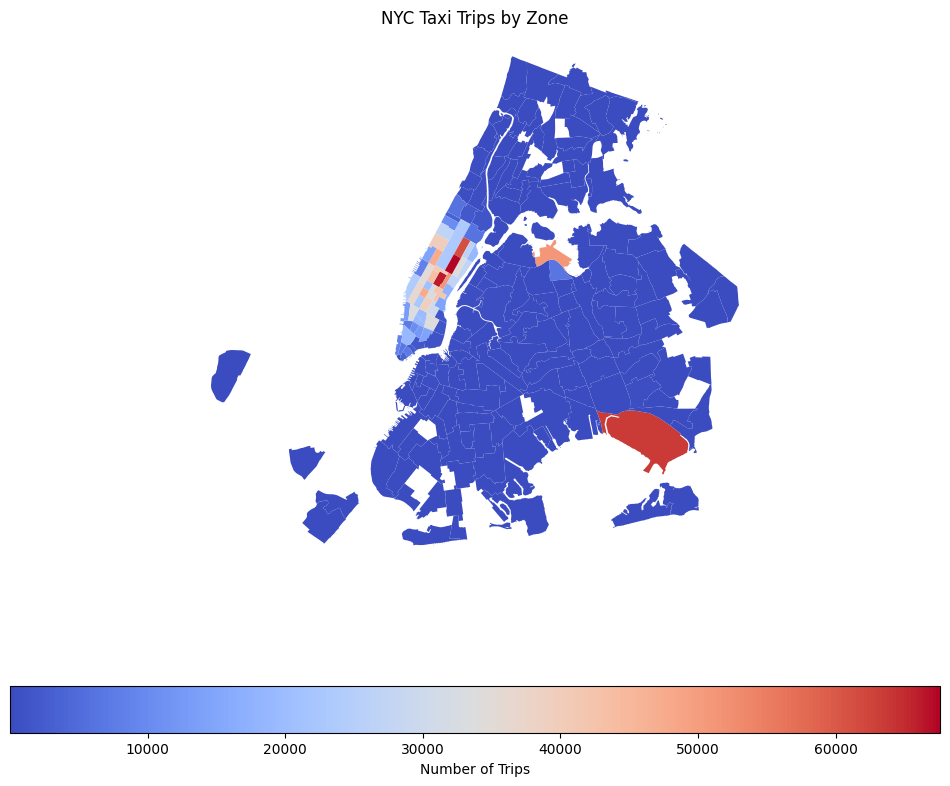

In [139]:
# Define figure and axis

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
zones_with_trips.plot(
    column='num_trips',
    ax=ax,
    legend=True,
    legend_kwds={
        'label': "Number of Trips",
        'orientation': "horizontal"
    },
    cmap='coolwarm'
)
# Plot the map and display it
ax.set_title("NYC Taxi Trips by Zone")
plt.axis('off')
plt.show()

In [140]:
# can you try displaying the zones DF sorted by the number of trips?

zones_with_trips_sorted = zones_with_trips.sort_values(by='num_trips', ascending=False)
zones_with_trips_sorted.head()

OBJECTID  Shape_Leng  Shape_Area                   zone  LocationID  \
236       237    0.042213    0.000096  Upper East Side South         237   
160       161    0.035804    0.000072         Midtown Center         161   
131       132    0.245479    0.002038            JFK Airport         132   
235       236    0.044252    0.000103  Upper East Side North         236   
137       138    0.107467    0.000537      LaGuardia Airport         138   

       borough                                           geometry  \
236  Manhattan  POLYGON ((993633.442 216961.016, 993507.232 21...   
160  Manhattan  POLYGON ((991081.026 214453.698, 990952.644 21...   
131     Queens  MULTIPOLYGON (((1032791.001 181085.006, 103283...   
235  Manhattan  POLYGON ((995940.048 221122.92, 995812.322 220...   
137     Queens  MULTIPOLYGON (((1019904.219 225677.983, 102031...   

     PULocationID  num_trips  
236         237.0    67581.0  
160         161.0    66097.0  
131         132.0    63591.0  
235         236.0    61343.0  
137         138.0    51162.0

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [141]:
# Find routes which have the slowest speeds at different times of the day

df_route = df[['PULocationID', 'DOLocationID', 'trip_distance', 'tpep_pickup_datetime', 'tpep_dropoff_datetime']].copy()
df_route['trip_duration_hrs'] = (df_route['tpep_dropoff_datetime'] - df_route['tpep_pickup_datetime']).dt.total_seconds() / 3600
df_route = df_route[(df_route['trip_duration_hrs'] > 0) & (df_route['trip_distance'] > 0)]
df_route['pickup_hour'] = df_route['tpep_pickup_datetime'].dt.hour
grouped = df_route.groupby(['PULocationID', 'DOLocationID', 'pickup_hour'])
speed_data = grouped.agg({
    'trip_distance': 'mean',
    'trip_duration_hrs': 'mean'
}).reset_index()
speed_data['avg_speed_mph'] = speed_data['trip_distance'] / speed_data['trip_duration_hrs']
slowest_routes = speed_data.sort_values(by='avg_speed_mph').head(10)
print(slowest_routes[['PULocationID', 'DOLocationID', 'pickup_hour', 'avg_speed_mph']])

<ipython-input-141-d820927fa36e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_route['pickup_hour'] = df_route['tpep_pickup_datetime'].dt.hour


       PULocationID  DOLocationID  pickup_hour  avg_speed_mph
72696           209           209           14       0.000096
74664           216           216            7       0.000099
2274             13           211            0       0.000256
7229             45           211           10       0.000266
19                1           264           11       0.000389
82690           233            43           22       0.000405
62504           163            89           19       0.000494
90125           238           100           23       0.000560
31201           114            97           14       0.000637
660               7             7           14       0.000800


How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

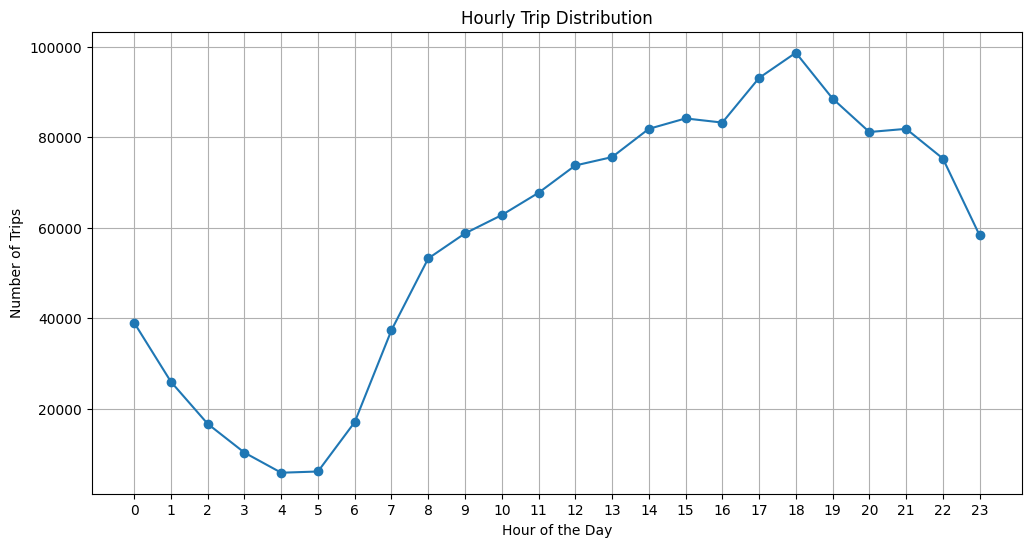

Busiest hour: 18
Number of trips during busiest hour: 98670


In [142]:
# Visualise the number of trips per hour and find the busiest hour

df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
hourly_trips = df.groupby('pickup_hour')['tpep_pickup_datetime'].count().reset_index(name='trip_count')
busiest_hour = hourly_trips.loc[hourly_trips['trip_count'].idxmax()]

plt.figure(figsize=(12, 6))
plt.plot(hourly_trips['pickup_hour'], hourly_trips['trip_count'], marker='o')
plt.title('Hourly Trip Distribution')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(range(24))
plt.grid(True)
plt.show()
print(f"Busiest hour: {busiest_hour['pickup_hour']}")
print(f"Number of trips during busiest hour: {busiest_hour['trip_count']}")

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [148]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.1

trip_counts = df.groupby('pickup_hour').size().reset_index(name='count')

top5_hours = trip_counts.sort_values(by='count', ascending=False).head(5)

top5_hours['scaled_count'] = (top5_hours['count'] / sample_fraction).astype(int)

print(top5_hours)

    pickup_hour  count  scaled_count
18           18  98670        986700
17           17  93096        930960
19           19  88538        885380
15           15  84158        841580
16           16  83238        832380


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

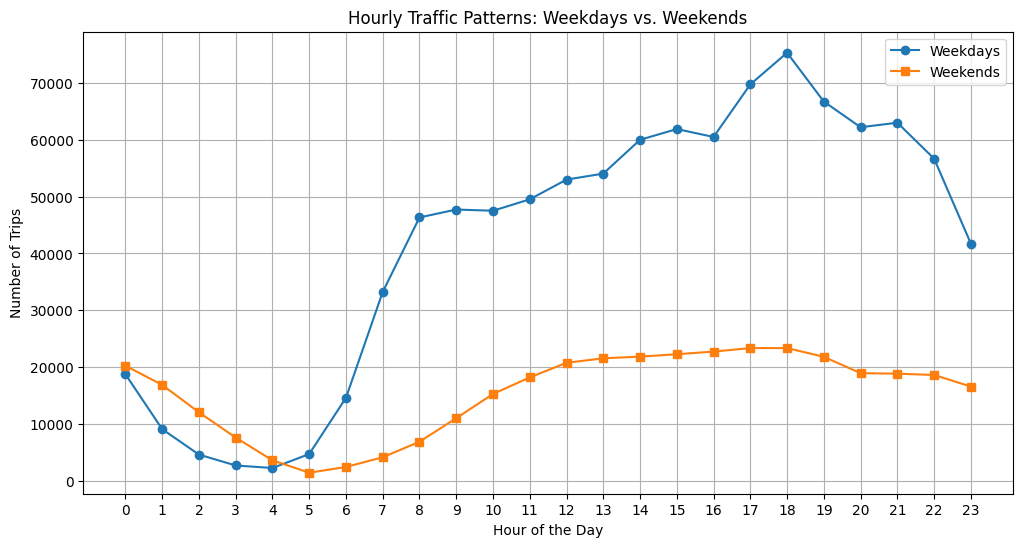

In [149]:
# Compare traffic trends for the week days and weekends

df['day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek  # Monday=0, Sunday=6
weekdays_df = df[df['day_of_week'] < 5]  # Monday to Friday
weekends_df = df[df['day_of_week'] >= 5]  # Saturday and Sunday
weekday_hourly_counts = weekdays_df.groupby(weekdays_df['tpep_pickup_datetime'].dt.hour)['tpep_pickup_datetime'].count()
weekend_hourly_counts = weekends_df.groupby(weekends_df['tpep_pickup_datetime'].dt.hour)['tpep_pickup_datetime'].count()

plt.figure(figsize=(12, 6))
plt.plot(weekday_hourly_counts.index, weekday_hourly_counts.values, label='Weekdays', marker='o')
plt.plot(weekend_hourly_counts.index, weekend_hourly_counts.values, label='Weekends', marker='s')
plt.title('Hourly Traffic Patterns: Weekdays vs. Weekends')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(range(24))
plt.legend()
plt.grid(True)
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [150]:
# Find top 10 pickup and dropoff zones

# Count pickups by location ID
top_pu = df['PULocationID'].value_counts().head(10).reset_index()
top_pu.columns = ['LocationID', 'Pickup_Trips']

top_pu = top_pu.merge(zones[['LocationID', 'zone']], on='LocationID', how='left')
print("Top 10 Pickup Zones:")
top_pu

Top 10 Pickup Zones:


LocationID  Pickup_Trips                          zone
0         237         67581         Upper East Side South
1         161         66097                Midtown Center
2         132         63591                   JFK Airport
3         236         61343         Upper East Side North
4         138         51162             LaGuardia Airport
5         162         51075                  Midtown East
6         186         47543  Penn Station/Madison Sq West
7         142         47298           Lincoln Square East
8         230         43074     Times Sq/Theatre District
9         170         41785                   Murray Hill

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [156]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
pickup_counts = df['PULocationID'].value_counts().rename('pickup_count')
dropoff_counts = df['DOLocationID'].value_counts().rename('dropoff_count')

ratios = pd.concat([pickup_counts, dropoff_counts], axis=1).fillna(0)
ratios['pickup_dropoff_ratio'] = ratios['pickup_count'] / ratios['dropoff_count'].replace(0, np.nan)
ratios = ratios.reset_index().rename(columns={'index': 'LocationID'})
ratios = ratios.merge(zones[['LocationID', 'zone']], on='LocationID', how='left')
ratios = ratios.set_index('zone')
pickup_dropoff_ratios = ratios['pickup_dropoff_ratio']
pickup_dropoff_ratios = ratios['pickup_dropoff_ratio'].dropna()
top_pickup_dropoff_ratio = pickup_dropoff_ratios.sort_values(ascending=False).head(10)
bottom_pickup_dropoff_ratio = pickup_dropoff_ratios.sort_values().head(10)

print("Top 10 Pickup/Dropoff Ratios by Zone:")
print(top_pickup_dropoff_ratio.round(2))

print("\nBottom 10 Pickup/Dropoff Ratios by Zone:")
print(bottom_pickup_dropoff_ratio.round(2))


Top 10 Pickup/Dropoff Ratios by Zone:
zone
East Elmhurst                   15.13
JFK Airport                      4.71
LaGuardia Airport                2.91
Penn Station/Madison Sq West     1.67
Greenwich Village South          1.40
Central Park                     1.38
West Village                     1.34
Midtown East                     1.28
Midtown Center                   1.22
Garment District                 1.21
Name: pickup_dropoff_ratio, dtype: float64

Bottom 10 Pickup/Dropoff Ratios by Zone:
zone
Jamaica Bay                          0.0
Fordham South                        0.0
Pelham Bay                           0.0
East Tremont                         0.0
Hollis                               0.0
Gravesend                            0.0
East New York/Pennsylvania Avenue    0.0
Manhattan Beach                      0.0
Norwood                              0.0
Oakland Gardens                      0.0
Name: pickup_dropoff_ratio, dtype: float64


<ipython-input-157-78d9cccbb899>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_pickup_dropoff_ratio.values, y=top_pickup_dropoff_ratio.index, palette='Greens_d')


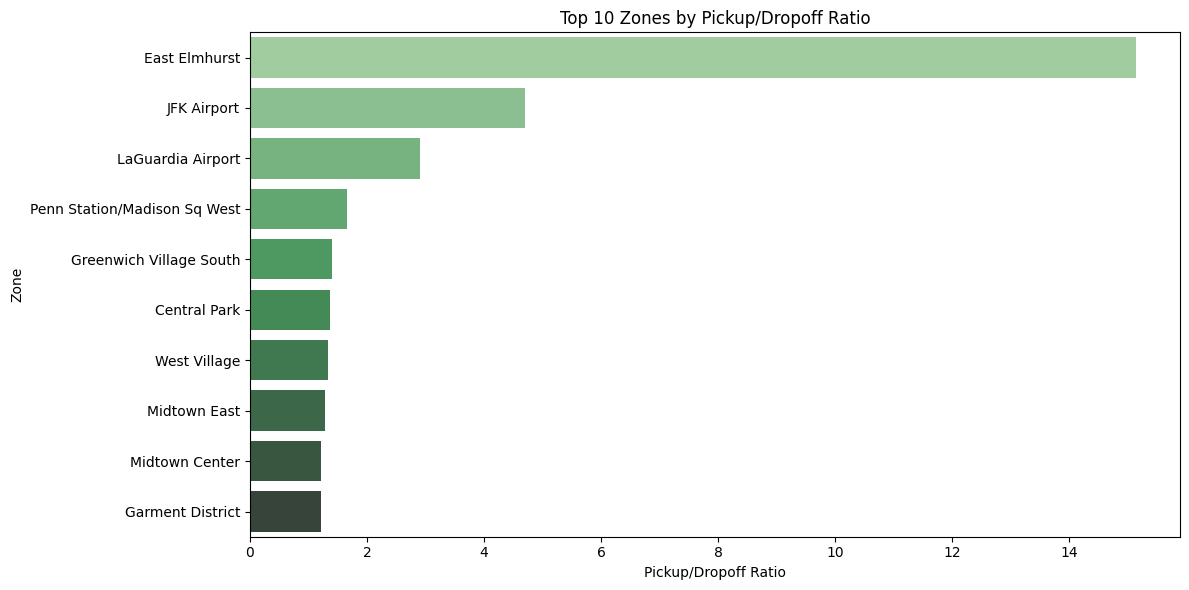

<ipython-input-157-78d9cccbb899>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_pickup_dropoff_ratio.values, y=bottom_pickup_dropoff_ratio.index, palette='Reds_d')


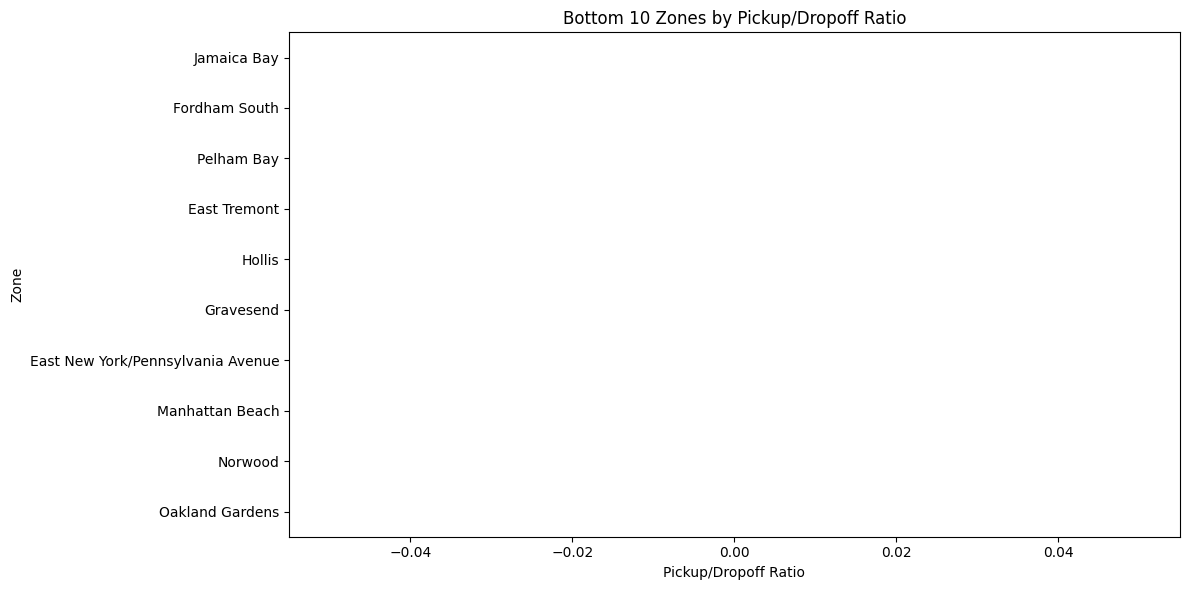

In [157]:
# Top 10
plt.figure(figsize=(12, 6))
sns.barplot(x=top_pickup_dropoff_ratio.values, y=top_pickup_dropoff_ratio.index, palette='Greens_d')
plt.title('Top 10 Zones by Pickup/Dropoff Ratio')
plt.xlabel('Pickup/Dropoff Ratio')
plt.ylabel('Zone')
plt.tight_layout()
plt.show()

# Bottom 10
plt.figure(figsize=(12, 6))
sns.barplot(x=bottom_pickup_dropoff_ratio.values, y=bottom_pickup_dropoff_ratio.index, palette='Reds_d')
plt.title('Bottom 10 Zones by Pickup/Dropoff Ratio')
plt.xlabel('Pickup/Dropoff Ratio')
plt.ylabel('Zone')
plt.tight_layout()
plt.show()


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [161]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

night_df = df[(df['tpep_pickup_datetime'].dt.hour >= 23) | (df['tpep_pickup_datetime'].dt.hour < 5)]


night_df = night_df.merge(
    zones[['LocationID', 'zone']].rename(columns={'LocationID': 'PULocationID', 'zone': 'pickup_zone'}),
    on='PULocationID',
    how='left'
)


night_df = night_df.merge(
    zones[['LocationID', 'zone']].rename(columns={'LocationID': 'DOLocationID', 'zone': 'dropoff_zone'}),
    on='DOLocationID',
    how='left'
)

top_night_pickups = night_df['pickup_zone'].value_counts().head(10)
top_night_dropoffs = night_df['dropoff_zone'].value_counts().head(10)

print("Top 10 Night-Time Pickup Zones (11 PM – 5 AM):")
print(top_night_pickups)

print("\nTop 10 Night-Time Dropoff Zones (11 PM – 5 AM):")
print(top_night_dropoffs)

Top 10 Night-Time Pickup Zones (11 PM – 5 AM):
pickup_zone
East Village                    12433
West Village                    10238
JFK Airport                      8867
Lower East Side                  7791
Clinton East                     7302
Greenwich Village South          7167
Times Sq/Theatre District        5373
Penn Station/Madison Sq West     4785
LaGuardia Airport                4698
Midtown South                    4611
Name: count, dtype: int64

Top 10 Night-Time Dropoff Zones (11 PM – 5 AM):
dropoff_zone
East Village                     6511
Clinton East                     4934
Murray Hill                      4711
Gramercy                         4582
Lenox Hill West                  4297
Yorkville West                   4192
East Chelsea                     4090
West Village                     3966
Upper East Side North            3534
Sutton Place/Turtle Bay North    3499
Name: count, dtype: int64


<ipython-input-162-87a023c1a3fd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_night_pickups.values, y=top_night_pickups.index, palette='Purples_d')


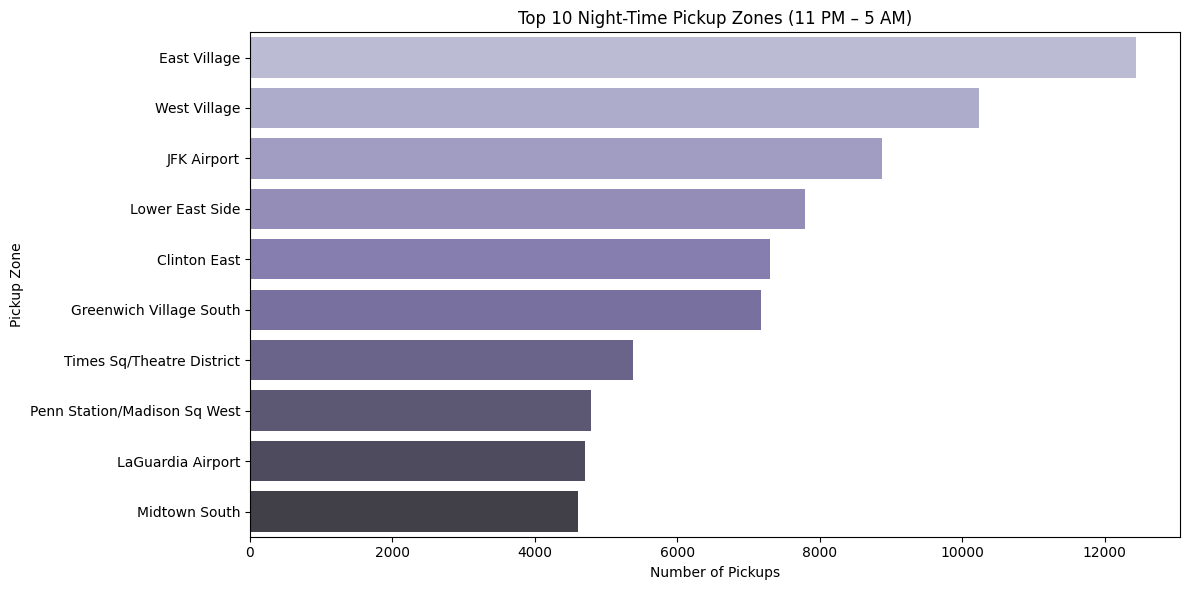

<ipython-input-162-87a023c1a3fd>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_night_dropoffs.values, y=top_night_dropoffs.index, palette='Blues_d')


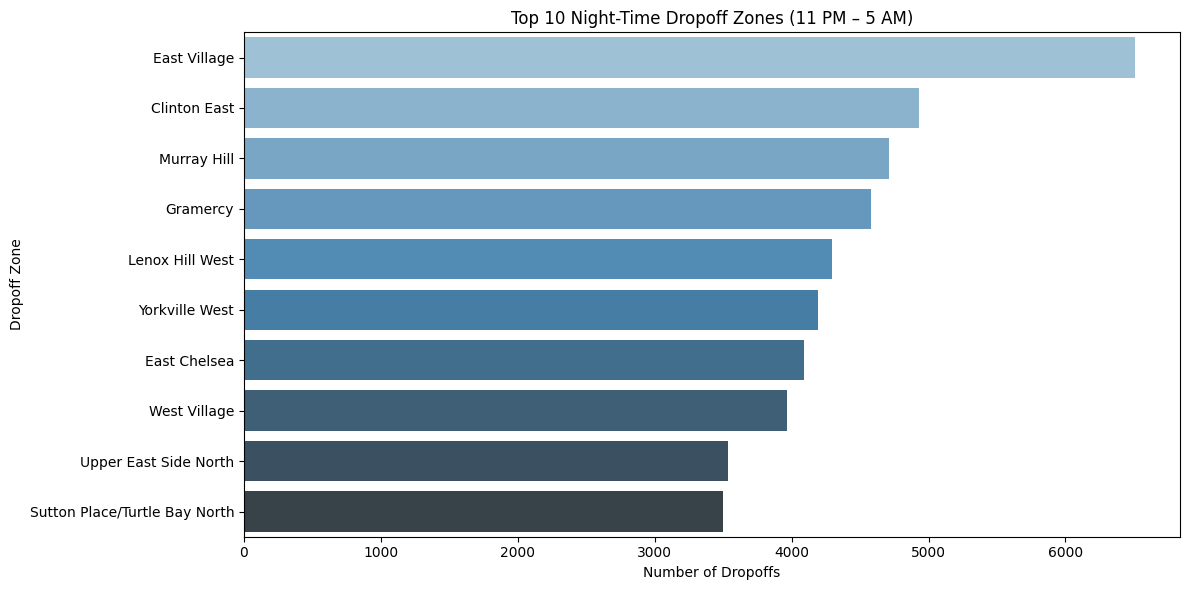

In [162]:
# Pickups
plt.figure(figsize=(12, 6))
sns.barplot(x=top_night_pickups.values, y=top_night_pickups.index, palette='Purples_d')
plt.title('Top 10 Night-Time Pickup Zones (11 PM – 5 AM)')
plt.xlabel('Number of Pickups')
plt.ylabel('Pickup Zone')
plt.tight_layout()
plt.show()

# Dropoffs
plt.figure(figsize=(12, 6))
sns.barplot(x=top_night_dropoffs.values, y=top_night_dropoffs.index, palette='Blues_d')
plt.title('Top 10 Night-Time Dropoff Zones (11 PM – 5 AM)')
plt.xlabel('Number of Dropoffs')
plt.ylabel('Dropoff Zone')
plt.tight_layout()
plt.show()

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [163]:
# Filter for night hours (11 PM to 5 AM)

df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

nighttime_df = df[(df['pickup_hour'] >= 23) | (df['pickup_hour'] <= 5)]  # 11 PM - 5 AM
daytime_df = df[(df['pickup_hour'] >= 6) & (df['pickup_hour'] <= 22)]  # 6 AM - 10 PM

nighttime_revenue = nighttime_df['total_amount'].sum()
daytime_revenue = daytime_df['total_amount'].sum()

total_revenue = df['total_amount'].sum()

nighttime_revenue_share = (nighttime_revenue / total_revenue) * 100
daytime_revenue_share = (daytime_revenue / total_revenue) * 100

print(f"Nighttime Revenue Share: {nighttime_revenue_share:.2f}%")
print(f"Daytime Revenue Share: {daytime_revenue_share:.2f}%")

Nighttime Revenue Share: 11.92%
Daytime Revenue Share: 88.08%


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [164]:
# Analyse the fare per mile per passenger for different passenger counts

valid_fares = df[(df['trip_distance'] > 0) & (df['passenger_count'] > 0)]
valid_fares['fare_per_mile_per_passenger'] = valid_fares['total_amount'] / (valid_fares['trip_distance'] * valid_fares['passenger_count'])
avg_fare_by_passenger = valid_fares.groupby('passenger_count')['fare_per_mile_per_passenger'].mean()
avg_fare_by_passenger


passenger_count
1.0    3.648000
2.0    2.019213
3.0    1.336073
4.0    1.489357
5.0    0.625955
6.0    0.548542
Name: fare_per_mile_per_passenger, dtype: float64

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [166]:
# Compare the average fare per mile for different days and for different times of the day

valid_df = df[(df['trip_distance'] > 0) & (df['total_amount'] > 0)]

valid_df['day_of_week'] = valid_df['tpep_pickup_datetime'].dt.day_name()
valid_df['hour_of_day'] = valid_df['tpep_pickup_datetime'].dt.hour

valid_df['fare_per_mile'] = valid_df['total_amount'] / valid_df['trip_distance']

fare_by_day = valid_df.groupby('day_of_week')['fare_per_mile'].mean().round(2)

fare_by_hour = valid_df.groupby('hour_of_day')['fare_per_mile'].mean().round(2)

ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fare_by_day = fare_by_day.reindex(ordered_days)

print("Average Fare per Mile by Day of the Week:")
print(fare_by_day)

print("\nAverage Fare per Mile by Hour of the Day:")
print(fare_by_hour)


Average Fare per Mile by Day of the Week:
day_of_week
Monday       3.69
Tuesday      3.70
Wednesday    3.73
Thursday     3.96
Friday       3.81
Saturday     3.61
Sunday       3.73
Name: fare_per_mile, dtype: float64

Average Fare per Mile by Hour of the Day:
hour_of_day
0     3.53
1     3.23
2     3.17
3     3.28
4     4.12
5     4.14
6     3.12
7     3.40
8     3.47
9     3.61
10    3.61
11    3.62
12    3.79
13    3.82
14    3.89
15    4.30
16    4.66
17    4.19
18    3.94
19    4.11
20    3.31
21    3.16
22    3.41
23    3.29
Name: fare_per_mile, dtype: float64


<ipython-input-167-bfb90ea38228>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fare_by_day.index, y=fare_by_day.values, palette='coolwarm')


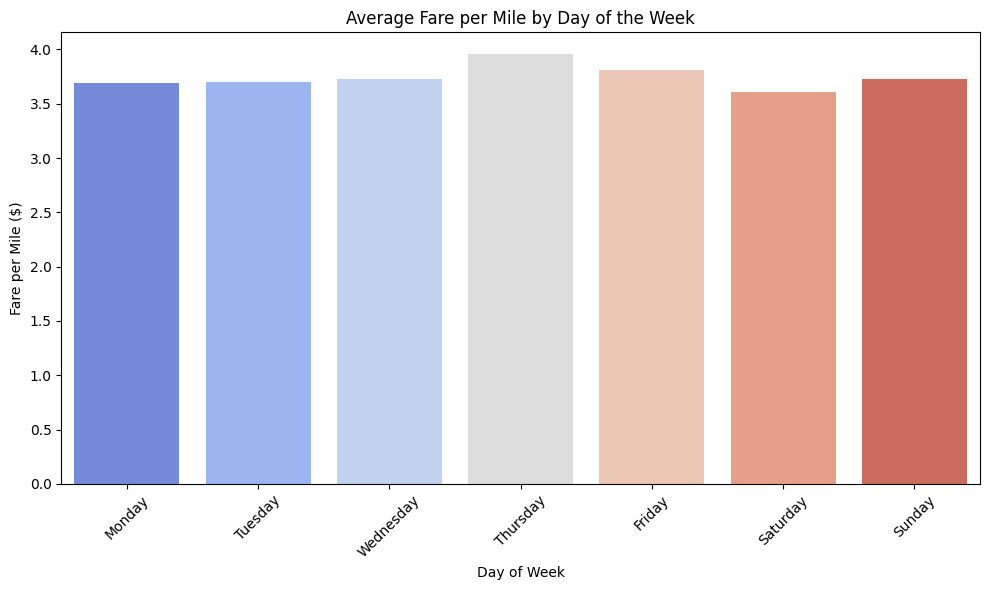

In [167]:
plt.figure(figsize=(10, 6))
sns.barplot(x=fare_by_day.index, y=fare_by_day.values, palette='coolwarm')
plt.title('Average Fare per Mile by Day of the Week')
plt.ylabel('Fare per Mile ($)')
plt.xlabel('Day of Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

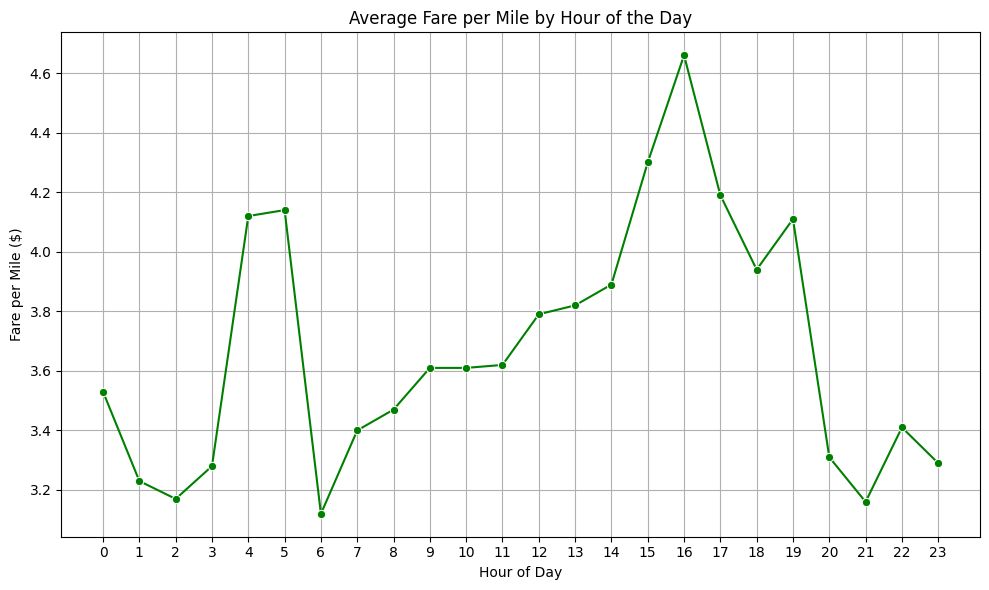

In [168]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=fare_by_hour.index, y=fare_by_hour.values, marker='o', color='green')
plt.title('Average Fare per Mile by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Fare per Mile ($)')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

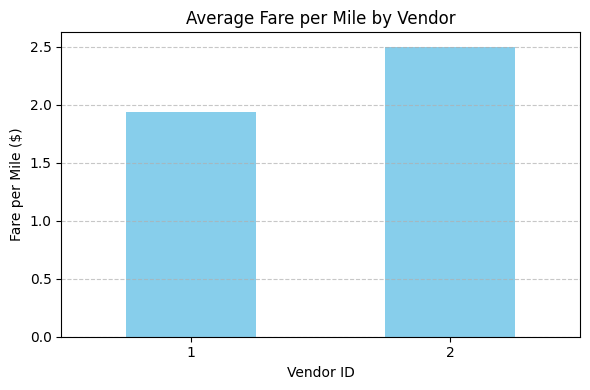

In [169]:
# Compare fare per mile for different vendors
df_vendor = df[df['trip_distance'] > 0].copy()

df_vendor['fare_per_mile'] = df_vendor['fare_amount'] / df_vendor['trip_distance']

vendor_fare_comparison = df_vendor.groupby('VendorID')['fare_per_mile'].mean().sort_values()

vendor_fare_comparison.plot(kind='bar', color='skyblue', figsize=(6, 4))
plt.title('Average Fare per Mile by Vendor')
plt.xlabel('Vendor ID')
plt.ylabel('Fare per Mile ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


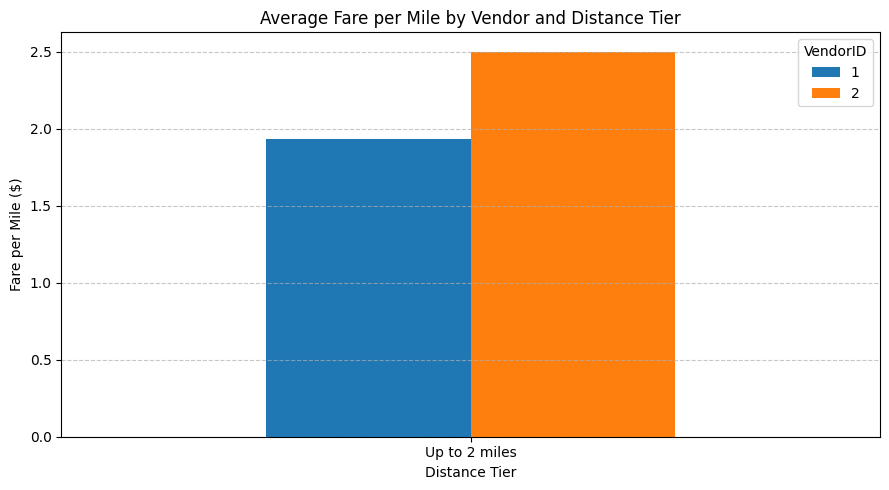

In [170]:
# Defining distance tiers
df['fare_per_mile'] = df['fare_amount'] / df['trip_distance']
df = df[df['trip_distance'] > 0]  # Avoid division by zero

tier1 = df[df['trip_distance'] <= 2].copy()
tier2 = df[(df['trip_distance'] > 2) & (df['trip_distance'] <= 5)].copy()
tier3 = df[df['trip_distance'] > 5].copy()

tier1['distance_tier'] = 'Up to 2 miles'
tier2['distance_tier'] = '2 to 5 miles'
tier3['distance_tier'] = 'More than 5 miles'

tiered_data = pd.concat([tier1, tier2, tier3])

avg_fare_by_tier = tiered_data.groupby(['distance_tier', 'VendorID'])['fare_per_mile'].mean().unstack()

avg_fare_by_tier.plot(kind='bar', figsize=(9, 5))
plt.title('Average Fare per Mile by Vendor and Distance Tier')
plt.xlabel('Distance Tier')
plt.ylabel('Fare per Mile ($)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [181]:
# Analyze tip percentages based on distances, passenger counts, and pickup times

# Compute tip percentage, avoid division by zero
df['tip_percentage'] = (df['tip_amount'] / (df['total_amount'] + 1e-6)) * 100

# Prepare a focused dataframe for analysis
tips_df = df[['trip_distance', 'passenger_count', 'total_amount', 'tip_amount', 'pickup_hour', 'tip_percentage']].copy()

# Preserve hour from pickup time
tips_df['hour'] = tips_df['pickup_hour']

# Categorize trip distances
tips_df['distance_category'] = pd.cut(
    tips_df['trip_distance'], [0, 2, 5, float('inf')],
    labels=['Up to 2 miles', '2 to 5 miles', 'More than 5 miles']
)

# Categorize passenger count
tips_df['passenger_category'] = pd.cut(
    tips_df['passenger_count'], [0, 1, 3, float('inf')],
    labels=['1 passenger', '2-3 passengers', '4+ passengers']
)

# Categorize pickup hour into time blocks
tips_df['time_category'] = pd.cut(
    tips_df['hour'], [0, 6, 12, 18, 24],
    labels=['Midnight to 6 AM', '6 AM to Noon', 'Noon to 6 PM', '6 PM to Midnight'],
    right=False
)

# Average tip percentage by distance
print("Average Tip Percentage by Distance:")
print(tips_df.groupby('distance_category', observed=True)['tip_percentage'].mean())

# Average tip percentage by passenger count
print("\nAverage Tip Percentage by Passenger Count:")
print(tips_df.groupby('passenger_category', observed=True)['tip_percentage'].mean())

# Average tip percentage by pickup time
print("\nAverage Tip Percentage by Time of Pickup:")
print(tips_df.groupby('time_category', observed=True)['tip_percentage'].mean())

# Identify low tip scenarios (<10%)
low_tip_factors = tips_df[tips_df['tip_percentage'] < 10]

print("\nMost Common Low Tip Scenarios:")
print(
    low_tip_factors
    .groupby(['distance_category', 'passenger_category', 'time_category'], observed=True)
    .size()
    .sort_values(ascending=False)
    .head(10)
)

# Re-bin distances more finely and calculate average tip by bin
distance_bins = [0, 1, 2, 5, 10, 20, 50]
tips_df['distance_bin'] = pd.cut(tips_df['trip_distance'], bins=distance_bins)

tip_by_distance = tips_df.groupby('distance_bin', observed=True)['tip_percentage'].mean()

print("\nAverage Tip Percentage by Distance Bins:")
print(tip_by_distance)


Average Tip Percentage by Distance:
distance_category
Up to 2 miles    33.438332
Name: tip_percentage, dtype: float64

Average Tip Percentage by Passenger Count:
passenger_category
1 passenger       33.402997
2-3 passengers    33.546444
4+ passengers     33.624117
Name: tip_percentage, dtype: float64

Average Tip Percentage by Time of Pickup:
time_category
Midnight to 6 AM    32.793350
6 AM to Noon        33.668020
Noon to 6 PM        33.719747
6 PM to Midnight    33.150088
Name: tip_percentage, dtype: float64

Most Common Low Tip Scenarios:
distance_category  passenger_category  time_category   
Up to 2 miles      1 passenger         6 PM to Midnight    6101
                                       Noon to 6 PM        5916
                                       6 AM to Noon        3166
                                       Midnight to 6 AM    1782
                   2-3 passengers      6 PM to Midnight    1602
                                       Noon to 6 PM        1546
            

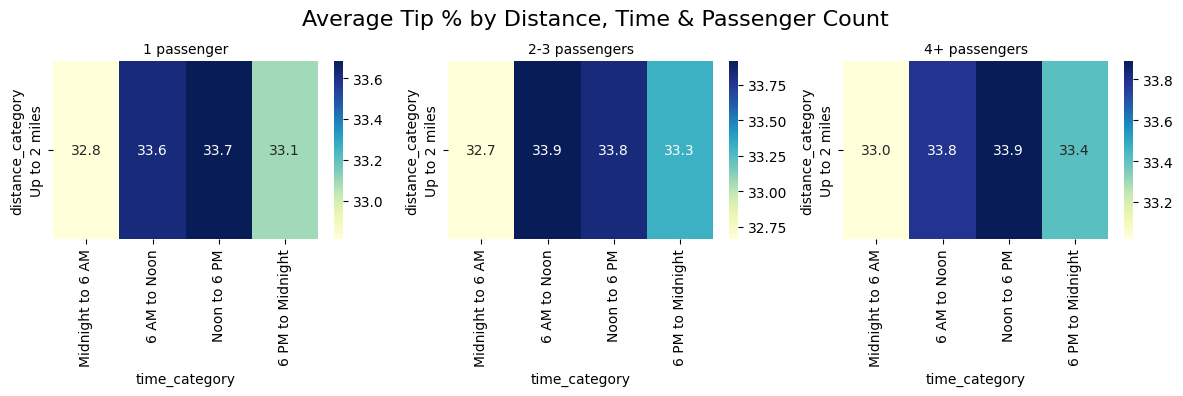

In [183]:
tip_summary = (
    tips_df
    .groupby(['distance_category', 'passenger_category', 'time_category'], observed=True)['tip_percentage']
    .mean()
    .reset_index()
)

g = sns.FacetGrid(
    tip_summary,
    col='passenger_category',
    height=4,
    aspect=1,
    sharex=False,
    sharey=False
)

# Draw a heatmap per passenger group
g.map_dataframe(
    lambda data, color: sns.heatmap(
        data.pivot(index='distance_category', columns='time_category', values='tip_percentage'),
        annot=True, fmt=".1f", cmap='YlGnBu', cbar=True
    )
)

g.set_titles(col_template='{col_name}')
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Average Tip % by Distance, Time & Passenger Count', fontsize=16)

plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [184]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

df['tip_percent'] = (df['tip_amount'] / (df['fare_amount'] + 1e-6)) * 100  # Avoid division by zero

low_tip = df[df['tip_percent'] < 10].copy()
high_tip = df[df['tip_percent'] > 25].copy()

comparison = pd.DataFrame({
    'Low Tip (<10%)': [
        low_tip['trip_distance'].mean(),
        low_tip['passenger_count'].mean(),
        low_tip['fare_amount'].mean(),
        low_tip['tip_amount'].mean()
    ],
    'High Tip (>25%)': [
        high_tip['trip_distance'].mean(),
        high_tip['passenger_count'].mean(),
        high_tip['fare_amount'].mean(),
        high_tip['tip_amount'].mean()
    ]
}, index=['Avg Trip Distance', 'Avg Passenger Count', 'Avg Fare Amount', 'Avg Tip Amount'])

print("Average Comparison Between Low and High Tip Trips:")
print(comparison.round(2))

Average Comparison Between Low and High Tip Trips:
                     Low Tip (<10%)  High Tip (>25%)
Avg Trip Distance              0.03             0.02
Avg Passenger Count            1.44             1.37
Avg Fare Amount                0.04             0.02
Avg Tip Amount                 0.00             0.01


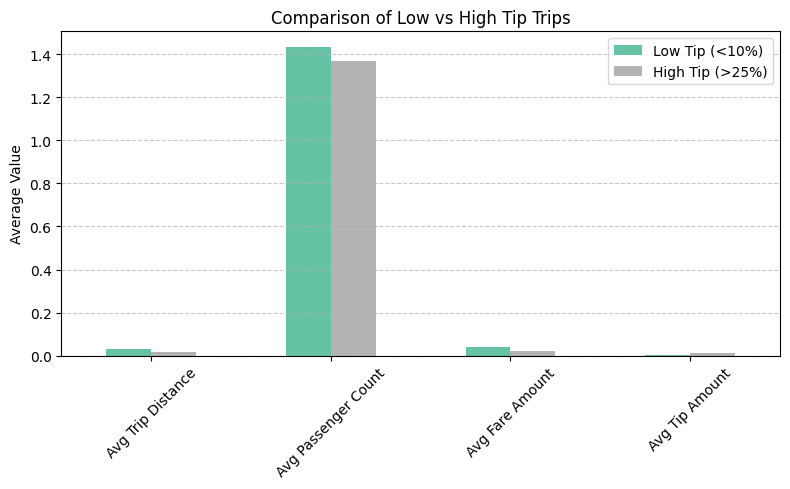

In [185]:
comparison.plot(kind='bar', figsize=(8, 5), colormap='Set2')
plt.title('Comparison of Low vs High Tip Trips')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

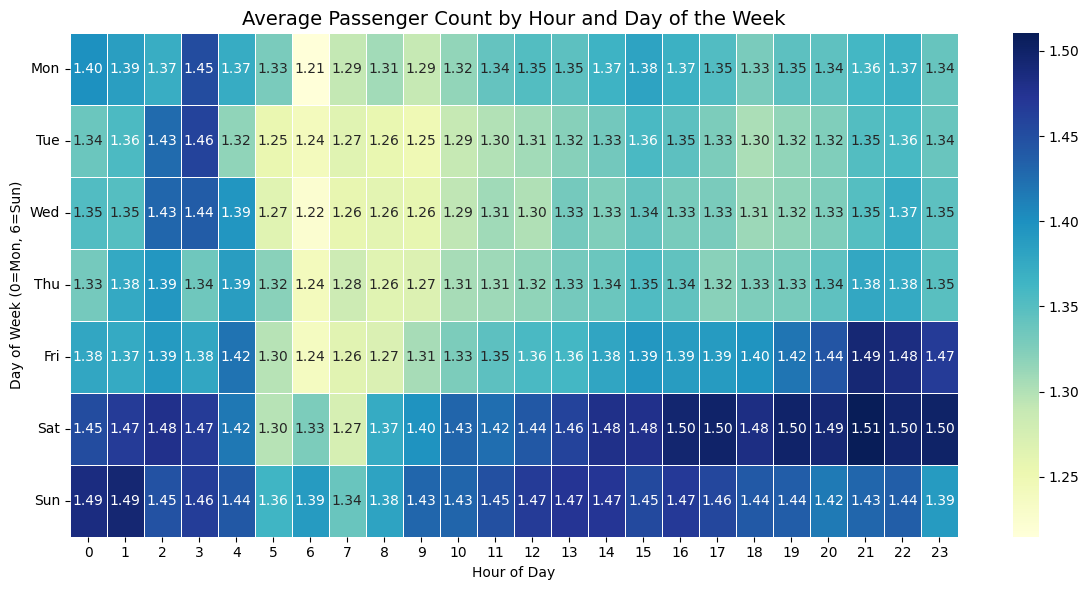

In [186]:
# See how passenger count varies across hours and days

df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_dayofweek'] = df['tpep_pickup_datetime'].dt.dayofweek

passenger_variation = df.groupby(['pickup_dayofweek', 'pickup_hour'])['passenger_count'].mean().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(passenger_variation, cmap='YlGnBu', linewidths=0.5, annot=True, fmt=".2f")
plt.title('Average Passenger Count by Hour and Day of the Week', fontsize=14)
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week (0=Mon, 6=Sun)')
plt.yticks(ticks=np.arange(7) + 0.5, labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)
plt.tight_layout()
plt.show()


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

<ipython-input-187-d1fa2a3b4b7d>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=zone_passenger_avg, x='passenger_count', y='zone', palette='Blues_d')


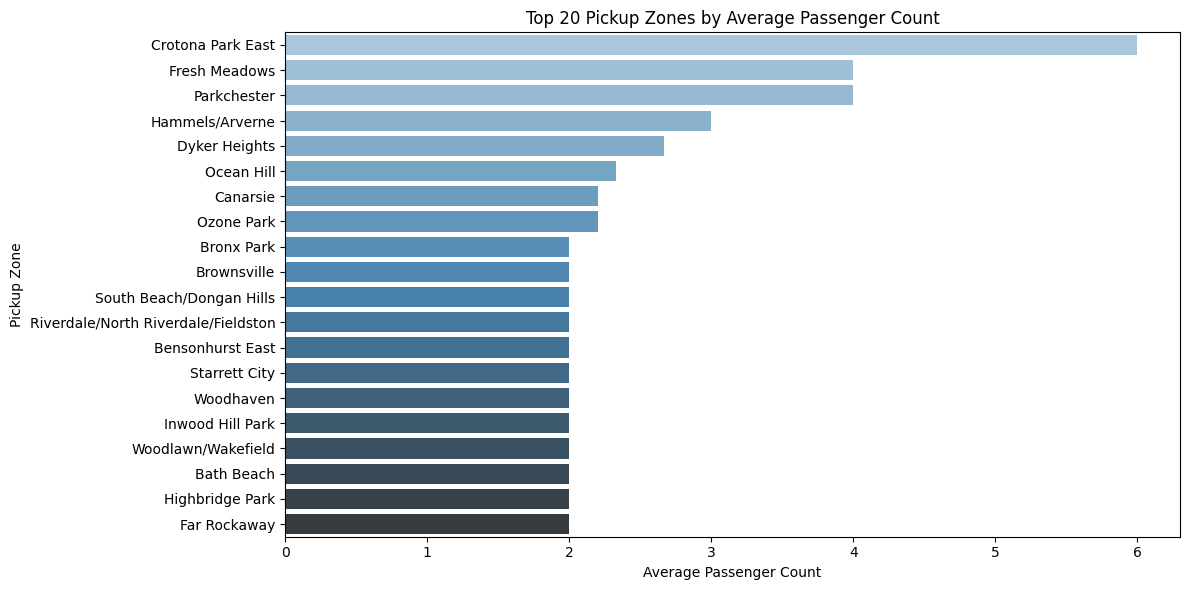

In [187]:
# How does passenger count vary across zones

zone_passenger_avg = df.groupby('PULocationID')['passenger_count'].mean().reset_index()

zone_passenger_avg = zone_passenger_avg.merge(zones[['LocationID', 'zone']], left_on='PULocationID', right_on='LocationID', how='left')

zone_passenger_avg = zone_passenger_avg.sort_values(by='passenger_count', ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(data=zone_passenger_avg, x='passenger_count', y='zone', palette='Blues_d')
plt.title('Top 20 Pickup Zones by Average Passenger Count')
plt.xlabel('Average Passenger Count')
plt.ylabel('Pickup Zone')
plt.tight_layout()
plt.show()

In [188]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
avg_passenger_by_zone = df.groupby('PULocationID')['passenger_count'].mean().reset_index()
avg_passenger_by_zone.rename(columns={'passenger_count': 'avg_passenger_count'}, inplace=True)
zones_with_trips = zones_with_trips.merge(avg_passenger_by_zone, left_on='LocationID', right_on='PULocationID', how='left')
zones_with_trips.head()


OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   PULocationID_x  num_trips  PULocationID_y  avg_passenger_count  
0             1.0       36.0             1.0             1.861111  
1             NaN        NaN             NaN                  NaN  
2             3.0        1.0             3.0             1.000000  
3             4.0     1370.0             4.0             1.442336  
4             NaN        NaN             NaN                  NaN

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

Frequency of Surcharge Application (%):
extra                     63.050997
mta_tax                   99.410658
tip_amount               100.000000
tolls_amount               8.276364
improvement_surcharge     99.998402
congestion_surcharge      94.823186
airport_fee_combined       8.393753
dtype: float64


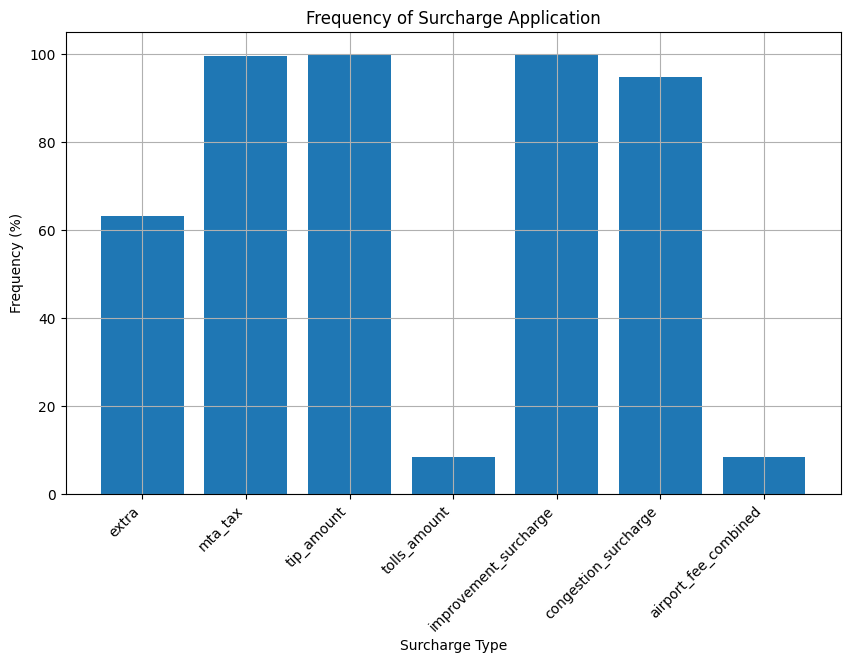

In [189]:
# How often is each surcharge applied?

surcharge_cols = ['extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge', 'airport_fee_combined']

surcharge_frequency = df[surcharge_cols].astype(bool).sum() / len(df) * 100

print("Frequency of Surcharge Application (%):")
print(surcharge_frequency)

plt.figure(figsize=(10, 6))
plt.bar(surcharge_frequency.index, surcharge_frequency.values)
plt.title('Frequency of Surcharge Application')
plt.xlabel('Surcharge Type')
plt.ylabel('Frequency (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

### Answer:
Based on the analysis of temporal, geographical, financial, and operational patterns, the following recommendations are proposed to improve routing, dispatching, and overall service efficiency:
1. Demand-Responsive Dispatching

    Target High-Demand Zones and Periods:
    Prioritize dispatching to areas with consistently high trip volumes, such as airports, transportation hubs, and nightlife districts, particularly during peak hours, weekends, and seasonal surges.

    Enhance Nighttime Coverage:
    Increase vehicle availability in zones with elevated nighttime demand, especially around entertainment and nightlife venues.

    Accommodate Group Travel and Shared Rides:
    Promote and incentivize shared ride options to address patterns of multiple-passenger demand and optimize fleet utilization.

2. Supply Optimization

    Dynamic Fleet Allocation:
    Adjust taxi distribution in real time based on predictive demand models to ensure adequate coverage across time and geography.

    Incentivized Repositioning:
    Introduce driver incentives for repositioning to underserved or imbalanced areas where demand outpaces supply.

    Dynamic Pricing Strategies:
    Implement flexible fare models that reflect demand levels, trip distances, and peak periods to optimize profitability and resource allocation.

3. Service Quality and Customer Experience

    Driver Training and Standards Enforcement:
    Maintain high service quality through regular driver training, performance monitoring, and feedback integration.

    Multiple Payment Options:
    Ensure convenience by supporting various payment methods including mobile and contactless options.

    Encourage Ride-Sharing Adoption:
    Promote shared ride features to enhance accessibility, reduce congestion, and lower passenger costs.

4. Continuous Monitoring and Improvement

    Real-Time Analytics and Adaptive Strategy:
    Leverage continuous data monitoring and feedback loops to refine dispatching algorithms, predict emerging trends, and improve service responsiveness.

    Public-Private Collaboration:
    Work collaboratively with city transportation authorities to align taxi operations with broader urban mobility goals and address regulatory or infrastructural barriers.

Conclusion

Through a data-driven understanding of passenger behavior, demand patterns, and operational inefficiencies, taxi services in New York City can significantly enhance efficiency, responsiveness, and customer satisfaction. By integrating dynamic dispatch strategies, flexible supply management, and a commitment to continuous improvement, operators can better meet evolving urban transportation needs and ensure sustainable service growth.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

### Answer :

Informed by temporal, spatial, and seasonal patterns identified through trip data analysis, the following strategies are recommended to optimize taxi positioning and enhance service efficiency across New York City:
1. Time-Based Deployment

    Peak Hour Adjustments:
    Increase cab availability during morning and evening rush hours to accommodate commuter demand.

    Nighttime Coverage:
    Strategically position taxis in nightlife and entertainment districts to meet elevated demand during late-night hours.

    Midday Optimization:
    Reallocate underutilized vehicles during midday periods to zones with consistent daytime activity (e.g., tourist areas, hospitals).

    Seasonal and Monthly Trends:
    Adjust fleet distribution based on historical monthly demand variations, accounting for weather, holidays, and citywide events.

2. Day-of-Week Strategies

    Weekday Focus on Business Districts:
    Concentrate taxi supply in commercial and financial hubs during weekdays to serve office commuters and business travelers.

    Weekend Reallocation to Leisure Zones:
    Shift positioning toward residential, shopping, and recreational areas on weekends to align with shifting trip purposes.

    Event-Aware Deployment:
    Monitor event calendars and enhance taxi presence near venues during major city events, parades, and public gatherings.

3. Zone-Based Optimization

    High-Demand Hotspots:
    Prioritize zones consistently associated with high pickup and dropoff volumes, such as airports, transit stations, and popular destinations.

    Addressing Imbalances:
    Use trip data to identify and rectify areas with pickup/dropoff disparities by encouraging driver migration or repositioning.

    Nighttime Activity Zones:
    Enhance cab presence in late-night activity clusters, particularly in entertainment corridors and nightlife districts.

4. Data-Driven Dynamic Positioning

    Real-Time Fleet Management:
    Utilize live trip data and demand forecasts to dynamically reallocate taxis across the city.

    Predictive Modeling:
    Employ machine learning models to anticipate demand spikes based on historical patterns, weather, and traffic data.

    Ride-Hailing Integration:
    Incorporate data from e-hailing platforms to improve responsiveness and minimize idle time.

5. Collaborative Operational Planning

    Driver Communication:
    Equip drivers with tools and guidance based on data insights to support smarter positioning decisions.

    Public-Sector Coordination:
    Collaborate with city planners and transportation authorities to ensure alignment with infrastructure, traffic management, and public transit needs.

6. Technological Enablement

    GPS and Heatmaps:
    Deploy real-time location tracking and demand heatmaps to visualize trends and optimize deployment zones.

    Operational Dashboards:
    Develop interactive dashboards to monitor performance metrics and guide decision-making at both the fleet and individual driver levels.

Conclusion

By implementing these strategic positioning recommendations, taxi fleets can better align with demand fluctuations across time, geography, and customer behavior. A data-informed, adaptive deployment strategy ensures more efficient operations, reduced passenger wait times, and improved overall service delivery within the dynamic urban landscape of New York City.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

### Answer :

To maximize revenue while maintaining competitive market positioning, taxi service providers should adopt a flexible and analytical approach to pricing. Based on insights derived from trip patterns, customer behavior, and market dynamics, the following recommendations are proposed:
1. Dynamic Pricing Implementation

    Real-Time Fare Adjustments:
    Introduce a dynamic pricing model that responds to fluctuations in demand, supply availability, weather conditions, and traffic congestion.

    Peak and Off-Peak Variations:
    Increase fare rates during high-demand periods (e.g., rush hours, holidays) and offer reduced pricing or promotions during low-demand intervals to balance utilization.

2. Tiered and Distance-Based Pricing

    Short-Trip Affordability:
    Maintain competitive flat rates or low base fares for trips within short distance thresholds to attract budget-conscious passengers.

    Long-Trip Tiers:
    Apply tiered pricing structures for medium and long-distance trips, incentivizing higher-value rides while maintaining fairness.

    Zone-Based Adjustments:
    Consider implementing fare variations based on geographic zones, particularly for trips involving high-demand or low-supply regions.

3. Shared Ride Incentivization

    Occupancy Optimization:
    Promote shared ride options with discounted fares to increase average vehicle occupancy and reduce per-passenger costs.

    Group Travel Offers:
    Introduce bundled or group discounts to attract larger parties and improve revenue per ride without increasing fleet requirements.

4. Surcharge Strategy Optimization

    Data-Backed Surcharge Policies:
    Analyze historical surcharge application patterns (e.g., night, airport, weather-based) to refine surcharge criteria.

    Peak Period Surcharges:
    Implement moderate peak surcharges during periods of excessive demand to ensure driver availability while maintaining customer trust.

    Transparency and Communication:
    Clearly communicate surcharge policies to customers to foster trust and reduce dissatisfaction.

5. Competitive Benchmarking

    Market Price Tracking:
    Continuously monitor fare structures of competing ride-hailing platforms and traditional taxi vendors.

    Value Proposition Alignment:
    Adjust fares where necessary to remain competitive, while emphasizing service quality, reliability, and unique features that justify premium pricing when applicable.

6. Continuous Evaluation and Optimization

    Data-Driven Testing:
    Employ A/B testing and pilot programs to evaluate the effectiveness of new pricing models across different customer segments and times.

    Customer Behavior Analysis:
    Analyze response patterns to fare changes, promotions, and discounts to inform iterative pricing adjustments.

    Revenue vs. Satisfaction Trade-Offs:
    Maintain an equilibrium between revenue maximization and customer satisfaction by prioritizing fair, predictable, and value-driven pricing.

Conclusion

By adopting a data-driven and adaptive pricing strategy, taxi operators can enhance revenue generation, improve resource utilization, and remain competitive in an evolving urban mobility landscape. Transparent communication, customer sensitivity, and continuous refinement will ensure long-term success and customer loyalty in New York City’s dynamic transportation ecosystem.

